<div class="alert alert-block alert-info">
<center> <h1> Machine Learning - PROJECT </h1> </center> <br>
<center> <h2> Group 26 </h2> </center> <br>
    <center> <h3> 2024/2025 </h3> </center>

Student Name - Pedro Santos <br>
Student id - 20240295 <br>
Contact e-mail - 20240295@novaims.unl.pt <br>

Student Name - Diogo Correia   <br>
Student id - 20211586  <br>
Contact e-mail - 20211586@novaims.unl.pt <br>

Student Name - Oumaima Ben Hfaiedh  <br>
Student id - 20240699 <br>
Contact e-mail - 20240699@novaims.unl.pt  <br>

Student Name -  Rita Morgadito <br>
Student id -  20240611 <br>
Contact e-mail -  20240611@novaims.unl.pt <br>

Student Name -   Duarte Miguel <br>
Student id -  20240608<br>
Contact e-mail -  20240608@novaims.unl.pt <br>


# <a id = "Index"></a>

# Table of Contents

# *OPEN-ENDED SECTION*

### Context:

The main purpose of this section, is to predict as target the "Agreement Reached" instead of the Claim Injury Type in our main notebook. Several things will change since this is a binary result (0/1) and not a multi class classification. We will use appropriate metrics, and most likely a different model to obtain the best possible set of results.
- Moreover, the EDA part was purposely excluded from this section, not because it is meaningless, but for simplicity and readability purposes. The functions that were provided in our final notebook, can be simply adapted to the "Agreement Reached" target instead of the "Claim Injury Type", nevertheless, the main features remain the same, therefore we felt that there was no need to go over this again in this notebook.

 <a class="anchor" id="context">

# 0. Context and Meta Data

</a>

#### Predictors
`Accident Date` - Injury date of the claim.<br>
`Age at Injury` -  Age of injured worker when the injury occurred. <br>
`Alternative Dispute Resolution` - Adjudication processes external to the Board. <br>
`Assembly Date` - The date the claim was first assembled. <br>
`Attorney/Representative` - Is the claim being represented by an Attorney? <br>
`Average Weekly Wage` - The wage used to calculate workers’ compensation,
disability, or an Paid Leave wage replacement benefits <br>
`Birth Year` - The reported year of birth of the injured worker. <br>
`C-2 Date` - Date of receipt of the Employer's Report of Work-Related
Injury/Illness or equivalent (formerly Form C-2) <<br>
`C-3 Dtae`  Date Form C-3 (Employee Claim Form) was received.- <br>
`Carrier Name` -Name of primary insurance provider responsible for providing workers compensation coverage to the injured workers employe. <br> `Carrier Type` - Type of primary insurance provider responsible for providing workers compensation coverage.<br>
`Claim Identifier` - Unique identifier for each claim, assigned by WCB <br>
`County of Injury` - Name of the New York County where the injury occurred  <br>
`COVID-19 Indicator`- Indication that the claim may be associated with COVID-19 <br>
`District Name` - Name of the WCB district office that oversees claims for that region or area of the state.<br>
`First Hearing Date` - Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.<br>
`Gender` - The reported gender of the injured worker <br>
`IME-4 Count`- Number of IME-4 forms received per claim. The IME-4 form is
the “Independent Examiner's Report of Independent Medical
Examination” form. <br>
`Industry Code`- The code of the industry where the worker works<br>
`Industry Code Description`-  The description realted to the industry where the worker works<br>
`Medical Fee Region`- Approximate region where the injured worker would receive medical service <br>
`OIICS Nature of Injury Description`- OIICS Nature of Injury Description <br>
`WCIO Cause of Injury Code`- The code of the cause of Injury <br>
`WCIO Cause of Injury Description`- The description related to the code of the cause of injury<br>
`WCIO Nature of Injury Code`- The code of the nature of injury <br>
`WCIO Nature of Injury Description`- The description related to the code of the nature of injury<br>
`WCIO Part Of Body Code`- The code of the workers body part that was injured <br>
`WCIO Part Of Body Description`- The descrition related to the code of the workers body part that was injured <br>
`Zip Code`- The reported ZIP code of the injured worker’s home address.<br>
`Agreement Reached` - Binary variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim <br>
`Number of Dependents`- Number of dependers on the workers (family members) <br>
`WCB Decision`-Multiclass variable: Decision of the WCB relative to the claim:
“Accident” means that claim refers to workplace accident,
“Occupational Disease” means illness from the workplace. ->
requires WCB deliberation so it is unknown at start of claim <br>
#### Target
`Agreement Reached`- Main target variable: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim<br>
<br>


 <a class="anchor" id="importlibraries">

# 1. Importing and Loading of Dataset

</a>

<a class="anchor" id="importlibraries">

## 1.1. Importing Libraries

</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, PredefinedSplit

from sklearn.impute import KNNImputer


from sklearn.preprocessing import RobustScaler, LabelEncoder
from feature_engine.encoding import CountFrequencyEncoder  # pip install feature-engine



from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

from sklearn.linear_model import LassoCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import ( classification_report, f1_score , confusion_matrix )


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_val_score

# from ydata_profiling import ProfileReport


<a class="anchor" id="loadingdata">

## 1.2. Loading and Reading Data

</a>

We start off by importing our dataset using read_csv from pandas.

In [2]:
# Importing training and testing dataset
train = pd.read_csv("train_data.csv") 
test = pd.read_csv("test_data.csv")

<span style="font-family:Calibri; font-size:16px;">
We start by checking the size of <span style="color:green; font-weight:bold">Train </span> and <span style="color:green; font-weight:bold">Test </span> datasets
</span>

In [3]:
print(train.shape)
print(test.shape)

(593471, 33)
(387975, 30)


<span style="font-family:Calibri; font-size:16px;">
Then we checked the first 5 rows of each dataset:
</span>

In [4]:
pd.set_option('display.max_columns', None)
train.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name Carrier Type  Claim Identifier  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE           5393875   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  1A. PRIVATE           5393091   
2         NaN     INDEMNITY INSURANCE CO OF  1A. PRIVATE           5393889   
3         NaN                           NaN          NaN         957648180   
4         NaN          STATE INSURANCE FUND      2A. SIF           5393887   

  Claim Injury Type County of Injury COVID-19 Indicator District Name  \
0       2. NON-COMP     ST. LAWRENCE                  N      SYRACUSE   
1      4. TEMPORARY          WYOMING                  N     ROCHESTER   
2      4. TEMPORARY           ORANGE                  N        ALBANY   
3               NaN              NaN                NaN           NaN   
4       2. NON-COMP         DUTCHESS                  N        ALBANY   

  First Hearing Date Gender  IME-4 Count  Industry Code  \
0                NaN      M          NaN           44.0   
1         2020-02-21      F          4.0           23.0   
2                NaN      M          NaN           56.0   
3                NaN    NaN          NaN            NaN   
4                NaN      M          NaN           62.0   

                           Industry Code Description Medical Fee Region  \
0                                       RETAIL TRADE                  I   
1                                       CONSTRUCTION                  I   
2  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...                 II   
3                                                NaN                NaN   
4                  HEALTH CARE AND SOCIAL ASSISTANCE                 II   

   OIICS Nature of Injury Description  WCIO Cause of Injury Code  \
0                                 NaN                       27.0   
1                                 NaN                       97.0   
2                                 NaN                       79.0   
3                                 NaN                        NaN   
4                                 NaN                       16.0   

  WCIO Cause of Injury Description  WCIO Nature of Injury Code  \
0     FROM LIQUID OR GREASE SPILLS                        10.0   
1                REPETITIVE MOTION                        49.0   
2   OBJECT BEING LIFTED OR HANDLED                         7.0   
3                              NaN                         NaN   
4  HAND TOOL, UTENSIL; NOT POWERED                        43.0   

  WCIO Nature of Injury Description  WCIO Part Of Body Code  \
0                         CONTUSION                    62.0   
1                    SPRAIN OR TEAR                    38.0   
2                        CONCUSSION                    10.0   
3                               NaN                     NaN   
4                          PUNCTURE                    36.0   

  WCIO Part Of Body Description Zip Code  Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662                0.0  Not Work Related   
1                   S

<a class="anchor" id="briefanalysis">

## 1.3. Brief Preliminary Analysis

</a>

In [5]:
print(train.columns)
print("----------------------------------------------")
print(test.columns)

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')
----------------------------------------------
Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Aver

Checking data types:

In [6]:
print(train.info())
print("------------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

Looking at missing values:

In [7]:
print("The missing values for our train set are:\n",train.isna().sum())
print("--------------------------------------------------")
print("The missing values for our test set are:\n", test.isna().sum())

The missing values for our train set are:
 Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee 

Brief statistical Overview:

In [8]:
# For our numerical features:
train.describe().T

count          mean           std  \
Age at Injury                       574026.0  4.211427e+01  1.425643e+01   
Average Weekly Wage                 545375.0  4.910883e+02  6.092918e+03   
Birth Year                          544948.0  1.886768e+03  4.146444e+02   
Claim Identifier                    593471.0  2.366760e+07  1.079271e+08   
IME-4 Count                         132803.0  3.207337e+00  2.832303e+00   
Industry Code                       564068.0  5.864531e+01  1.964417e+01   
OIICS Nature of Injury Description       0.0           NaN           NaN   
WCIO Cause of Injury Code           558386.0  5.438114e+01  2.587428e+01   
WCIO Nature of Injury Code          558369.0  4.101384e+01  2.220752e+01   
WCIO Part Of Body Code              556944.0  3.973815e+01  2.236594e+01   
Agreement Reached                   574026.0  4.666513e-02  2.109208e-01   
Number of Dependents                574026.0  3.006559e+00  2.000801e+00   

                                          min        25%        50%  \
Age at Injury                             0.0       31.0       42.0   
Average Weekly Wage                       0.0        0.0        0.0   
Birth Year                                0.0     1965.0     1977.0   
Claim Identifier                    5393066.0  5593414.5  5791212.0   
IME-4 Count                               1.0        1.0        2.0   
Industry Code                            11.0       45.0       61.0   
OIICS Nature of Injury Description        NaN        NaN        NaN   
WCIO Cause of Injury Code                 1.0       31.0       56.0   
WCIO Nature of Injury Code                1.0       16.0       49.0   
WCIO Part Of Body Code                   -9.0       33.0       38.0   
Agreement Reached                         0.0        0.0        0.0   
Number of Dependents                      0.0        1.0        3.0   

                                          75%          max  
Age at Injury                            54.0        117.0  
Average Weekly Wage                     841.0    2828079.0  
Birth Year                             1989.0       2018.0  
Claim Identifier                    5991000.5  999891667.0  
IME-4 Count                               4.0         73.0  
Industry Code                            71.0         92.0  
OIICS Nature of Injury Description        NaN          NaN  
WCIO Cause of Injury Code                75.0         99.0  
WCIO Nature of Injury Code               52.0         91.0  
WCIO Part Of Body Code                   53.0         99.0  
Agreement Reached                         0.0          1.0  
Number of Dependents                      5.0          6.0

For our object data types:

In [9]:
train.describe(include="object").T

count unique  \
Accident Date                      570337   5539   
Alternative Dispute Resolution     574026      3   
Assembly Date                      593471   1096   
Attorney/Representative            574026      2   
C-2 Date                           559466   2475   
C-3 Date                           187245   1648   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
First Hearing Date                 150798   1094   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389  10060   
WCB Decision                       574026      1   

                                                                 top    freq  
Accident Date                                             2020-03-01    1245  
Alternative Dispute Resolution                                     N  571412  
Assembly Date                                             2020-03-06    1422  
Attorney/Representative                                            N  392291  
C-2 Date                                                  2021-05-11    1847  
C-3 Date                                                  2021-04-21     350  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
First Hearing Date                                        2022-04-15     440  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3302  
WCB Decision                                        Not Work Related  574026

In [10]:
train['Agreement Reached'].unique()

array([ 0.,  1., nan])

In [11]:
train["Agreement Reached"].value_counts()

Agreement Reached
0.0    547239
1.0     26787
Name: count, dtype: int64

*KEY NOTE*: This analysis is very important, and is a pillar for the models and metrics that will be analyzed. It is apparent and clear that we have class imbalance. Appropriate methods will be used to look, and treat accordingly.

 <a class="anchor" id="preprocessing">

# 3. Data Preproceesing

</a>

A key step in preprocessing is handling incoherences, missing values, outliers and do feature engineering. Nevertheless, any preprocessing we do on our train set, will need to be replicated on our test so our model can evaluate correctly. But we need to be careful, meaning that any transformations like scaling, encoding or imputing missing values should be calculated based on the training data only.
- After fitting the preprocessing steps in the training data, we can apply these exact same steps to our test set, without refitting. This ensures that the test data has identical transformations and remains a true "holdout" set.
- This is major in terms of avoiding data leakage, which is the risk of our model "seeing" information from test set, leading to over-optimistic performance.
- One goal is also to replicate our validation set as closely as possible to our test set, to get the best generalization possible.
- To recapitulate: Fit all transformations on training set and apply these without refitting to the test set.

 <a class="anchor" id="incoherences">

## 3.1 Splitting Training Data and Addressing Incoherences

</a>

During our EDA, we noticed some incoherences which will be dealt with before treating outliers and missing values: 

<span style="color:red; font-weight:bold">The first major Issue</span> was that we had few rows in which we had missing values in all features except for Claim Identifier and Assembly Date. <br>
<span style="color:green; font-weight:bold">Proposed Solution:</span> Since there is no real information we can extract from these rows we decided to drop them before we split the data (nearly 20K rows were removed)

In [12]:
# Excluding the features we do not wish to look at since there are no missing values present
excluded_features = ["Assembly Date", "Claim Identifier"]
cond = train.drop(columns=excluded_features).isna().all(axis=1)


train = train[~cond]
print(train.shape)
# We succesfully removed rows for which no information was available.

(574026, 33)


<span style="color:red; font-weight:bold">The second major Issue:</span> Claim Identifier should be representative of a number, (an identifier) and therefore not used as a feature.<br><span style="color:green; font-weight:bold">Proposed Solution:</span> Setting Claim Identifier as Index

In [13]:
train.set_index('Claim Identifier', inplace=True)
test.set_index('Claim Identifier', inplace= True)

#### Splitting Training Data

After these two main problems, we fortunately eliminated a lot of missing values present. And we can already split our dataset safely.

In [14]:
X = train.drop(columns="Agreement Reached")  # Features
y = train["Agreement Reached"]  # Target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
#Note: Stratification is used thanks to our analysis on class imbalance, this a necessary step.

<span style="color:red; font-weight:bold">The third major Issue:</span> We found that the feature "OIICS Nature of Injury Description" contains no value in all the rows. <br>
<span style="color:green; font-weight:bold">Proposed Solution:</span>We explored the website through the link provided in metadatas. However, this feature does not contribute any useful information to our dataset, and its lack of variation makes it unhelpful for modeling so we decided to drop it from training, validation and test dataset

In [15]:
# Dropping from Train and Validation and test.
X_train = X_train.drop(columns="OIICS Nature of Injury Description")
X_val = X_val.drop(columns="OIICS Nature of Injury Description")

test = test.drop(columns="OIICS Nature of Injury Description")

<span style="color:red; font-weight:bold">The forth major Issue:</span> Forth major incoherence arises when we take a deeper look at our metadata, and our data sets. The features "Claim Injury Type" and "WCB Decision" are not present in our test set (as well as our target logically), we should therefore drop these values since they should not influence our training in no form whatsoever.<br><span style="color:green; font-weight:bold">Proposed Solution:</span> Giving this reasoning, the normal choice here is to instantly drop these features. This will help to resolve conflicts later on.


In [16]:
# Dropping from Train and Validation.
X_train = X_train.drop(columns=["Claim Injury Type","WCB Decision"])
X_val = X_val.drop(columns=["Claim Injury Type","WCB Decision"])

We can also start by extracting and defining some date time variables for manuseability purposes:

In [17]:
#### Setting our variables to year for manuseability.
#Assembly Date
X_train["Assembly Date"] = pd.to_datetime(X_train["Assembly Date"])
X_val["Assembly Date"] = pd.to_datetime(X_val["Assembly Date"])
test["Assembly Date"] = pd.to_datetime(test["Assembly Date"])

# # C-2 Date
X_train["C-2 Date"] = pd.to_datetime(X_train["C-2 Date"])
X_val["C-2 Date"] = pd.to_datetime(X_val["C-2 Date"])
test["C-2 Date"] = pd.to_datetime(test["C-2 Date"])

# # C-3 Date
X_train["C-3 Date"] = pd.to_datetime(X_train["C-3 Date"])
X_val["C-3 Date"] = pd.to_datetime(X_val["C-3 Date"])
test["C-3 Date"] = pd.to_datetime(test["C-3 Date"])


X_train["Assembly Date"] = X_train["Assembly Date"].dt.year
X_val["Assembly Date"] = X_val["Assembly Date"].dt.year
test["Assembly Date"] = test["Assembly Date"].dt.year

X_train["C-2 Date"] = X_train["C-2 Date"].dt.year
X_val["C-2 Date"] = X_val["C-2 Date"].dt.year
test["C-2 Date"] = test["C-2 Date"].dt.year

X_train["C-3 Date"] = X_train["C-3 Date"].dt.year
X_val["C-3 Date"] = X_val["C-3 Date"].dt.year
test["C-3 Date"] = test["C-3 Date"].dt.year

 <a class="anchor" id="missing">

## 3.2 Adressing Missing Values

</a>

Now that the logical incoherences have been solved, we can start looking at treating missing values.

In [18]:
print(X_train.isna().sum())

Accident Date                          2794
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   21537
Birth Year                            21842
C-2 Date                              10941
C-3 Date                             290107
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   317494
Gender                                    0
IME-4 Count                          330934
Industry Code                          7466
Industry Code Description              7466
Medical Fee Region                        0
WCIO Cause of Injury Code             11734
WCIO Cause of Injury Description      11734
WCIO Nature of Injury Code      

#### Accident Date

A particular and logical imputation for some missing values for Accident Date is computing it by summing the birth year with the Age at Injury!

In [19]:
# Train
X_train["Accident Date"] = pd.to_datetime(X_train["Accident Date"])
X_val["Accident Date"] = pd.to_datetime(X_val["Accident Date"])
# Val
X_train["Accident Date"] = X_train["Accident Date"].dt.year
X_val["Accident Date"] = X_val["Accident Date"].dt.year
# Test
test["Accident Date"] = pd.to_datetime(test["Accident Date"])
test["Accident Date"] = test["Accident Date"].dt.year

In [20]:
# Setting Birth Year as year as well
# Train
X_train["Birth Year"] = pd.to_datetime(X_train["Birth Year"])
X_val["Birth Year"] = pd.to_datetime(X_val["Birth Year"])
# Val
X_train["Birth Year"] = X_train["Birth Year"].dt.year
X_val["Birth Year"] = X_val["Birth Year"].dt.year
# Test
test["Birth Year"] = pd.to_datetime(test["Birth Year"])
test["Birth Year"] = test["Birth Year"].dt.year


In [21]:
# Filling the missing values with our logical reasoning.
X_train["Accident Date"] = X_train["Accident Date"].fillna(X_train["Birth Year"] + X_train["Age at Injury"])
X_val["Accident Date"] = X_val["Accident Date"].fillna(X_val["Birth Year"] + X_val["Age at Injury"])

# Test
test["Accident Date"] = test["Accident Date"].fillna(test["Birth Year"] + test["Age at Injury"])

Accident Date missing values dropped from 2336  to 111. <span style="color:orange; font-weight:bold">Remaining missing values will be computed by KNNImputer as fallback</span>

#### Birth Year

In [22]:
# Same logic is applied here, but inversed!
X_train["Birth Year"] = X_train["Birth Year"].fillna(X_train["Accident Date"] - X_train["Age at Injury"])
X_val["Birth Year"] = X_val["Birth Year"].fillna(X_val["Accident Date"] - X_val["Age at Injury"])

# Test
test["Birth Year"] = test["Birth Year"].fillna(test["Accident Date"] - test["Age at Injury"])

Birth Year missing values dropped from 19721  to 111 same as accident date since it depends from its values. <span style="color:orange; font-weight:bold">Remaining missing values will be computed by KNNImputer as fallback</span>

#### Age at Injury

Feature age at injury doesn't include any NAN values. However, it includes values equal 0 which doesn't make a sense that's why we decided to replace the 0 values to NaN 

In [23]:
# Replacing:
X_train["Age at Injury"] = X_train["Age at Injury"].replace(0,np.nan)

X_val["Age at Injury"] = X_val["Age at Injury"].replace(0,np.nan)

test["Age at Injury"] = test["Age at Injury"].replace(0,np.nan)

Following previous logical assumptions:
- (-Age at Injury) = Birth Year - Accident Date
- Which equals: Age at Injury = Birth Year - Accident Date
- We can compute absolute value of this calculation.

In [24]:
X_train["Age at Injury"] = X_train["Age at Injury"].fillna(abs(X_train["Birth Year"] - X_train["Accident Date"]))

X_val["Age at Injury"] = X_val["Age at Injury"].fillna(abs(X_val["Birth Year"] - X_val["Accident Date"]))

test["Age at Injury"] = test["Age at Injury"].fillna(abs(test["Birth Year"] - test["Accident Date"]))

Age at Injury missing values dropped to 111 same as accident date since it depends from its values. <span style="color:orange; font-weight:bold">Remaining missing values will be computed by KNNImputer as fallback</span>

So basically we will use the KNN Imputer for remaining missing variables in Age at Injury, Birth Year, Accident Date

#### Average Weekly Wage

This variable includes in training dataset 19523 missing values, we decided to deal with the missing values through categorizing the wages as follows:
* if wage is unknown (which is a nan value) -> the wage will be assigned category 0
* if wage is between 0 and 500 -> the wage will be assigned category 1
* if wage is between 500 and 1000 -> the wage will be assigned category 2
* if wage is between 1000 and 1500 -> the wage will be assigned category 3
* if wage is between 1500 and 2000 -> the wage will be assigned category 4
* if wage is more than 2000 -> the wage will be assigned category 5

In [25]:
X_train["Average Weekly Wage"] = X_train["Average Weekly Wage"].replace(0,np.nan)

X_val["Average Weekly Wage"] = X_val["Average Weekly Wage"].replace(0,np.nan)

test["Average Weekly Wage"] = test["Average Weekly Wage"].replace(0,np.nan)

###

X_train["Average Weekly Wage"] = X_train["Average Weekly Wage"].fillna("Unknown")

X_val["Average Weekly Wage"] = X_val["Average Weekly Wage"].fillna("Unknown")

test["Average Weekly Wage"] = test["Average Weekly Wage"].fillna("Unknown")

In [26]:
def avwg(wage):
    if wage == "Unknown":
        return 0
    elif wage >= 0 and wage <= 500:
        return 1
    elif wage > 500 and wage <= 1000:
        return 2
    elif wage > 1000 and wage <= 1500:
        return 3
    elif wage > 1500 and wage <= 2000:
        return 4
    else:
        return 5
    
X_train["Average Weekly Wage"] = X_train["Average Weekly Wage"].apply(avwg)

X_val["Average Weekly Wage"] = X_val["Average Weekly Wage"].apply(avwg)

test["Average Weekly Wage"] = test["Average Weekly Wage"].apply(avwg)

The number of missing values dropped from 19523 to 0.

#### IME-4 Count

This variable includes in training dataset 316318 missing values, we decided to deal with the missing values through categorizing the IME's as follows:
* if IME is unknown (which is a nan value) -> the IME will be assigned category 0
* if IME is 1 -> the IME will be assigned category 1
* if IME is 2 -> the IME will be assigned category 2
* if IME is 3 -> the IME will be assigned category 3
* if IME is 4 -> the IME will be assigned category 4
* if IME is 5 -> the IME will be assigned category 5
* if IME is 6 -> the IME will be assigned category 6
* if IME is 7 -> the IME will be assigned category 7
* if IME is something else than these (8+) -> the IME will be assigned category 8

In [27]:
X_train["IME-4 Count"] = X_train["IME-4 Count"].replace(0,np.nan)

X_val["IME-4 Count"] = X_val["IME-4 Count"].replace(0,np.nan)

test["IME-4 Count"] = test["IME-4 Count"].replace(0,np.nan)

###

X_train["IME-4 Count"] = X_train["IME-4 Count"].fillna("Unknown")

X_val["IME-4 Count"] = X_val["IME-4 Count"].fillna("Unknown")

test["IME-4 Count"] = test["IME-4 Count"].fillna("Unknown")

In [28]:
def agg_ime(ime):
    if ime == "Unknown":
        return 0 
    elif ime == 1:
        return 1
    elif ime == 2:
        return 2
    elif ime == 3:
        return 3
    elif ime == 4:
        return 4
    elif ime == 5:
        return 5
    elif ime == 6:
        return 6
    elif ime == 7:
        return 7
    else:
        return 8
    
X_train["IME-4 Count"] = X_train["IME-4 Count"].apply(agg_ime)

X_val["IME-4 Count"] = X_val["IME-4 Count"].apply(agg_ime)

test["IME-4 Count"] = test["IME-4 Count"].apply(agg_ime)

#### First Hearing Date

As we know, values that are missing actually hold a true meaning, we will keep it that way!

In [29]:
X_train["First Hearing Date"] = pd.to_datetime(X_train["First Hearing Date"])
X_val["First Hearing Date"] = pd.to_datetime(X_val["First Hearing Date"])
test["First Hearing Date"] = pd.to_datetime(test["First Hearing Date"])

X_train["First Hearing Date"] = X_train["First Hearing Date"].dt.year
X_val["First Hearing Date"] = X_val["First Hearing Date"].dt.year
test["First Hearing Date"] = test["First Hearing Date"].dt.year

In [30]:
X_train["First Hearing Date"] = X_train["First Hearing Date"].fillna("Unknown")

X_val["First Hearing Date"] = X_val["First Hearing Date"].fillna("Unknown")

test["First Hearing Date"] = test["First Hearing Date"].fillna("Unknown")

In [31]:
def agg_fhd(fhd):
    if fhd != "Unknown":
        return 0
    else:
        return 1

X_train["First Hearing Date"] = X_train["First Hearing Date"].apply(agg_fhd)

X_val["First Hearing Date"] = X_val["First Hearing Date"].apply(agg_fhd)

test["First Hearing Date"] = test["First Hearing Date"].apply(agg_fhd)

#### Gender

Overall objective here was to reduce noise as much as possible. We feel that its best to capture these "outliers" as a whole.

In [32]:
X_train["Gender"] = X_train["Gender"].replace({"U": "Other", "X": "Other"})

X_val["Gender"] = X_val["Gender"].replace({"U": "Other", "X": "Other"})

test["Gender"] = test["Gender"].replace({"U": "Other", "X": "Other"})

#### District Name & Attorney/Representative & Covid-19 Indicator & Medical Fee Region

We will leave this variable as is, and later on encode it!

#### Alternative Dispute Resolution

Our "U" values are so residual it accounts for almost nothing, we will replace these with majority values proportionally.

In [33]:
# Reducing the noise by replacing with most common value:
X_train["Alternative Dispute Resolution"] = X_train["Alternative Dispute Resolution"].replace({"U":"N"})

X_val["Alternative Dispute Resolution"] = X_val["Alternative Dispute Resolution"].replace({"U":"N"})

test["Alternative Dispute Resolution"] = test["Alternative Dispute Resolution"].replace({"U":"N"})

#### County of Injury

As per our EDA, we noticed that we truly have many variables in this feature, and we are trying to capture the overall patterns and trends for our model to respond well.
- We have ~50 differente counties, which is a lot. We could perhaps keep the 20 most frequent counties which account for most values, and aggregate the others into a separate category.

In [34]:
top_20_counties = X_train["County of Injury"].value_counts().nlargest(20).index.tolist()


# Training
X_train["County of Injury"] = X_train["County of Injury"].apply(lambda x: x if x in top_20_counties else "Other")

# Validation
X_val["County of Injury"] = X_val["County of Injury"].apply(lambda x: x if x in top_20_counties else "Other")

# Test
test["County of Injury"] = test["County of Injury"].apply(lambda x: x if x in top_20_counties else "Other")



#### Carrier Type

Once more as seen in the EDA, these variables that are being replaced were very residual, so we put them all in one basket to reduce the noise!

In [35]:
X_train["Carrier Type"] = X_train["Carrier Type"].replace({"UNKNOWN": "5D. SPECIAL FUND - UNKNOWN", "5C. SPECIAL FUND - POI CARRIER WCB MENANDS": "5D. SPECIAL FUND - UNKNOWN", "5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)": "5D. SPECIAL FUND - UNKNOWN"})

X_val["Carrier Type"] = X_val["Carrier Type"].replace({"UNKNOWN": "5D. SPECIAL FUND - UNKNOWN", "5C. SPECIAL FUND - POI CARRIER WCB MENANDS": "5D. SPECIAL FUND - UNKNOWN", "5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)": "5D. SPECIAL FUND - UNKNOWN"})

test["Carrier Type"] = test["Carrier Type"].replace({"UNKNOWN": "5D. SPECIAL FUND - UNKNOWN", "5C. SPECIAL FUND - POI CARRIER WCB MENANDS": "5D. SPECIAL FUND - UNKNOWN", "5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)": "5D. SPECIAL FUND - UNKNOWN"})

#### Carrier Name

Here we have around 2K different unique values, this is far too much for our model to capture the nuances and we must aggregate this further. The same logic as County of Injury was followed!

In [36]:
# Finding the top 50 carriers based on the training set only!!
top_50_carriers = X_train["Carrier Name"].value_counts().nlargest(50).index.tolist()

# Training 
X_train["Carrier Name"] = X_train["Carrier Name"].apply(lambda x: x if x in top_50_carriers else "Other")

# Validation 
X_val["Carrier Name"] = X_val["Carrier Name"].apply(lambda x: x if x in top_50_carriers else "Other")

# Test 
test["Carrier Name"] = test["Carrier Name"].apply(lambda x: x if x in top_50_carriers else "Other")


#### C-2 Date

We will aggregate this variable to try and reduce the noise. Encoding will be elaborated later on.
- It's important to note that, when defining our function for aggregation, we must keep in mind that our test set holds different date values, and we must fit this accordingly.

In [37]:
# Replacing "nans" with "Unknown" across all datasets!
X_train["C-2 Date"] = X_train["C-2 Date"].replace(np.nan, "Unknown")
X_val["C-2 Date"] = X_val["C-2 Date"].replace(np.nan, "Unknown")
test["C-2 Date"] = test["C-2 Date"].replace(np.nan, "Unknown")

In [38]:
# Defining a single aggregation function that handles all expected cases...
def agg_c2_date(year):
    if year == 2023:
        return 0
    elif year == 2022:
        return 1
    elif year == 2021:
        return 2
    elif year == 2020:
        return 3
    elif year == "Unknown":
        return 4
    elif year == 2024:  # This is for our test set
        return 5
    else:
        return 6  

In [39]:
# Train
X_train["C-2 Date"] = X_train["C-2 Date"].apply(agg_c2_date)
# Validation
X_val["C-2 Date"] = X_val["C-2 Date"].apply(agg_c2_date)
# Test
test["C-2 Date"] = test["C-2 Date"].apply(agg_c2_date)

#### C-3 Date

Our C-3 Date, will follow the same logic as C-2 Date!

In [40]:
X_train["C-3 Date"] = X_train["C-3 Date"].replace(np.nan, "Unknown")
X_val["C-3 Date"] = X_val["C-3 Date"].replace(np.nan, "Unknown")
test["C-3 Date"] = test["C-3 Date"].replace(np.nan, "Unknown")

In [41]:
# Applying the Aggregation to our variables.
X_train["C-3 Date"] = X_train["C-3 Date"].apply(agg_c2_date)
X_val["C-3 Date"] = X_val["C-3 Date"].apply(agg_c2_date)
test["C-3 Date"] = test["C-3 Date"].apply(agg_c2_date)

#### Zip Code

We will create a new variable here, which will be a direct derivation from the Zip Code, subsequently we will drop this feature entirely since a derivation from this one will become totally redudant with our current feature.

#### For the variables below we filled the missing values with the mode, but the mode that was defined in our train set! This was done because when we must "see" directly information on validation and test to train our model.

#### Industry Code and Description

*Key Note*: Industry Code is actually a category! Not a true numerical value. We will take the necessary precautions in our feature selection.

The following mapping was elaborated due to external information from verified sources: https://www.bls.gov/IAG/TGS/iag_index_naics.htm

In [42]:
# X_train['Industry Code'] = X_train['Industry Code Description'].replace({49.0: 48.0, 33.0: 31.0, 32.0: 31.0, 45.0: 44.0})
# X_val['Industry Code'] = X_val['Industry Code Description'].replace({49.0: 48.0, 33.0: 31.0, 32.0: 31.0, 45.0: 44.0})
# test['Industry Code'] = test['Industry Code Description'].replace({49.0: 48.0, 33.0: 31.0, 32.0: 31.0, 45.0: 44.0})

In [43]:
# # Define aggregated groups for the Industry Codes
# # aggregated_mapping = {
# #     62.0: "Health Care and Social Assistance",
# #     92.0: "Public Administration",
# #     61.0: "Educational Services",
# #     44.0: "Retail Trade",
# #     45.0: "Retail Trade",
# #     48.0: "Transportation and Warehousing",
# #     49.0: "Transportation and Warehousing",
# #     23.0: "Construction",
# #     72.0: "Accommodation and Food Services",
# #     56.0: "Administrative and Support Services",
# #     31.0: "Manufacturing",
# #     32.0: "Manufacturing",
# #     33.0: "Manufacturing",
# #     81.0: "Other Services",
# #     42.0: "Wholesale Trade",
# #     21.0: "Mining and Quarrying",
# #     22.0: "Utilities",
# #     11.0: "Agriculture, Forestry, Fishing, and Hunting",
# #     71.0: "Arts, Entertainment, and Recreation",
# #     51.0: "Information",
# #     53.0: "Real Estate and Rental and Leasing",
# #     54.0: "Professional and Technical Services",
# #     55.0: "Management of Companies"
# # }

# aggregated_mapping = {
#     62.0: 1,
#     92.0: 2,
#     61.0: 3,
#     44.0: 4,
#     45.0: 4,
#     48.0: 5,
#     49.0: 5,
#     23.0: 6,
#     72.0: 7,
#     56.0: 8,
#     31.0: 9,
#     32.0: 9,
#     33.0: 9,
#     81.0: 10,
#     42.0: 11,
#     21.0: 12,
#     22.0: 13,
#     11.0: 14,
#     71.0: 15,
#     51.0: 16,
#     53.0: 17,
#     54.0: 18,
#     55.0: 19
# }


# X_train['Industry Code'] = X_train['Industry Code'].map(aggregated_mapping)
# X_val['Industry Code'] = X_val['Industry Code'].map(aggregated_mapping)
# test['Industry Code'] = test['Industry Code'].map(aggregated_mapping)

In [44]:
# Calculating the mode for Industry Code and Industry Code Description in the training set
industry_code_mode = X_train["Industry Code"].mode()[0]
industry_code_description_mode = X_train["Industry Code Description"].mode()[0]

In [45]:
# Training
X_train["Industry Code"] = X_train["Industry Code"].replace(np.nan, industry_code_mode)
X_train["Industry Code Description"] = X_train["Industry Code Description"].replace(np.nan, industry_code_description_mode)

# Validation
X_val["Industry Code"] = X_val["Industry Code"].replace(np.nan, industry_code_mode)
X_val["Industry Code Description"] = X_val["Industry Code Description"].replace(np.nan, industry_code_description_mode)

# Test
test["Industry Code"] = test["Industry Code"].replace(np.nan, industry_code_mode)
test["Industry Code Description"] = test["Industry Code Description"].replace(np.nan, industry_code_description_mode)


#### WCIO Cause of Injury Code & Description

The following mapping was elaborated due to external information from verified sources:

https://www.nh.gov/labor/workers-comp/electronic-data/documents/edi-n-code-lists.pdf

In [46]:
# cause_of_injury_mapping = {
#     # I. Burn or Scald – Heat or Cold Exposures -- ENCODE AS 1
#     1: 1,
#     2: 1,
#     3: 1,
#     4: 1,
#     5: 1,
#     6: 1,
#     7: 1,
#     8: 1,
#     9: 1,
#     11: 1,
#     14: 1,
#     84: 1,

#     # II. Caught In, Under or Between - ENCODE AS 2
#     10: 2,
#     12: 2,
#     13: 2,
#     20: 2,

#     # III. Cut, Puncture, Scrape - ENCODE AS 3
#     15: 3,
#     16: 3,
#     17: 3,
#     18: 3,
#     19: 3,

#     # IV. Fall, Slip or Trip - ENCODE AS 4
#     25: 4,
#     26: 4,
#     27: 4,
#     28: 4,
#     29: 4,
#     30: 4,
#     31: 4,
#     32: 4,
#     33: 4,

#     # V. Motor Vehicle - ENCODE AS 5
#     40: 5,
#     41: 5,
#     45: 5,
#     46: 5,
#     47: 5,
#     48: 5,
#     50: 5,

#     # VI. Strain or Injury By - ENCODE AS 6
#     52: 6,
#     53: 6,
#     54: 6,
#     55: 6,
#     56: 6,
#     57: 6,
#     58: 6,
#     59: 6,
#     60: 6,
#     61: 6,
#     97: 6,

#     # VII. Striking Against or Stepping On - ENCODE AS 7
#     65: 7,
#     66: 7,
#     67: 7,
#     68: 7,
#     69: 7,
#     70: 7,

#     # VIII. Struck or Injured By ENCODE AS 8
#     81: 8,
#     94: 8,
#     95: 8,

#     # IX. Rubbed or Abraded By - ENCODE AS 9
#     94: 9,
#     95: 9,

#     # X. Miscellaneous Causes - ENCODE AS 10
#     82: 10,
#     87: 10,
#     88: 10,
#     89: 10,
#     90: 10,
#     91: 10,
#     96: 10,
#     98: 10,
#     74: 10,
#     75: 10,
#     76: 10,
#     77: 10,
#     78: 10,
#     79: 10,
#     80: 10,
#     86: 10
# }

# X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)
# X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)
# test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

In [47]:
cause_injury_code_mode = X_train["WCIO Cause of Injury Code"].mode()[0]
cause_injury_description_mode = X_train["WCIO Cause of Injury Description"].mode()[0]

In [48]:
# Train set:
X_train["WCIO Cause of Injury Code"] = X_train["WCIO Cause of Injury Code"].replace(np.nan, cause_injury_code_mode)
X_train["WCIO Cause of Injury Description"] = X_train["WCIO Cause of Injury Description"].replace(np.nan, cause_injury_description_mode)

# Validation set
X_val["WCIO Cause of Injury Code"] = X_val["WCIO Cause of Injury Code"].replace(np.nan, cause_injury_code_mode)
X_val["WCIO Cause of Injury Description"] = X_val["WCIO Cause of Injury Description"].replace(np.nan, cause_injury_description_mode)

# Test set
test["WCIO Cause of Injury Code"] = test["WCIO Cause of Injury Code"].replace(np.nan, cause_injury_code_mode)
test["WCIO Cause of Injury Description"] = test["WCIO Cause of Injury Description"].replace(np.nan, cause_injury_description_mode)


#### WCIO Nature of Injury Code & Description

In [49]:
# X_train['WCIO Cause of Injury Code'] = X_train['WCIO Cause of Injury Code'].replace({79.0: 17.0, 66.0: 17.0})
# X_val['WCIO Cause of Injury Code'] = X_val['WCIO Cause of Injury Code'].replace({79.0: 17.0, 66.0: 17.0})
# test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].replace({79.0: 17.0, 66.0: 17.0})

In [50]:
# nature_of_injury_mapping = {
#     # I. Specific Injury - ENCODE AS 1
#     1: 1,
#     2: 1,
#     3: 1,
#     4: 1,
#     7: 1,
#     10: 1,
#     13: 1,
#     16: 1,
#     19: 1,
#     22: 1,
#     25: 1,
#     28: 1,
#     30: 1,
#     31: 1,
#     32: 1,
#     34: 1,
#     36: 1,
#     37: 1,
#     40: 1,
#     41: 1,

#     # II. Poisoning, Electrocution, Puncture, Tear - ENCODE AS 2
#     42: 2,
#     43: 2,
#     46: 2,
#     47: 2,
#     49: 2,
#     52: 2,
#     54: 2,
#     55: 2,
#     58: 2,

#     # III. Respiratory or Internal Diseases - ENCODE AS 3
#     60: 3,
#     61: 3,
#     62: 3,
#     63: 3,
#     66: 3,
#     67: 3,

#     # IV. Infections or Occupational Diseases - ENCODE AS 4
#     68: 4,
#     69: 4,
#     70: 4,
#     71: 4,
#     72: 4,
#     73: 4,
#     74: 4,
#     75: 4,
#     76: 4,
#     77: 4,

#     # V. Multiple or Cumulative Injuries - ENCODE AS 5
#     78: 5,
#     79: 5,
#     80: 5,
#     90: 5,
#     91: 5
# }

# X_train['WCIO Nature of Injury Code'] = X_train['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)
# X_val['WCIO Nature of Injury Code'] = X_val['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)
# test['WCIO Nature of Injury Code'] = test['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

In [51]:
nature_injury_code_mode = X_train["WCIO Nature of Injury Code"].mode()[0]
nature_injury_description_mode = X_train["WCIO Nature of Injury Description"].mode()[0]

In [52]:
# Train set:
X_train["WCIO Nature of Injury Code"] = X_train["WCIO Nature of Injury Code"].replace(np.nan, nature_injury_code_mode)
X_train["WCIO Nature of Injury Description"] = X_train["WCIO Nature of Injury Description"].replace(np.nan, nature_injury_description_mode)

# Validation set
X_val["WCIO Nature of Injury Code"] = X_val["WCIO Nature of Injury Code"].replace(np.nan, nature_injury_code_mode)
X_val["WCIO Nature of Injury Description"] = X_val["WCIO Nature of Injury Description"].replace(np.nan, nature_injury_description_mode)

# Test set
test["WCIO Nature of Injury Code"] = test["WCIO Nature of Injury Code"].replace(np.nan, nature_injury_code_mode)
test["WCIO Nature of Injury Description"] = test["WCIO Nature of Injury Description"].replace(np.nan, nature_injury_description_mode)


#### WCIO Part of Body Description

In [53]:
# X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].replace({43.0: 22.0, 25.0: 18.0, 47.0: 23.0})
# X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].replace({43.0: 22.0, 25.0: 18.0, 47.0: 23.0})
# test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].replace({43.0: 22.0, 25.0: 18.0, 47.0: 23.0})

In [54]:
# # Define the mapping for Part of Body Codes
# part_of_body_mapping = {
#     # I. Head - ENCODE AS 1
#     10: 1,
#     11: 1,
#     12: 1,
#     13: 1,
#     14: 1,
#     15: 1,
#     16: 1,
#     17: 1,
#     18: 1,
#     19: 1,

#     # II. Neck - ENCODE AS 2
#     20: 2,
#     21: 2,
#     22: 2,
#     23: 2,
#     24: 2,
#     25: 2,
#     26: 2,

#     # III. Upper Extremities - ENCODE AS 3
#     30: 3,
#     31: 3,
#     32: 3,
#     33: 3,
#     34: 3,
#     35: 3,
#     36: 3,
#     37: 3,
#     38: 3,
#     39: 3,

#     # IV. Trunk - ENCODE AS 4
#     40: 4,
#     41: 4,
#     42: 4,
#     43: 4,
#     44: 4,
#     45: 4,
#     46: 4,
#     47: 4,
#     48: 4,
#     49: 4,
#     60: 4,
#     61: 4,
#     62: 4,
#     63: 4,

#     # V. Lower Extremities - ENCODE AS 5
#     50: 5,
#     51: 5,
#     52: 5,
#     53: 5,
#     54: 5,
#     55: 5,
#     56: 5,
#     57: 5
# }

# X_train['WCIO Part Of Body Code'] = X_train['WCIO Part Of Body Code'].map(part_of_body_mapping)
# X_val['WCIO Part Of Body Code'] = X_val['WCIO Part Of Body Code'].map(part_of_body_mapping)
# test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].map(part_of_body_mapping)

In [55]:
part_body_code_mode = X_train["WCIO Part Of Body Code"].mode()[0]
part_body_description_mode = X_train["WCIO Part Of Body Description"].mode()[0]

In [56]:
# Train set
X_train["WCIO Part Of Body Code"] = X_train["WCIO Part Of Body Code"].replace(np.nan, part_body_code_mode)
X_train["WCIO Part Of Body Description"] = X_train["WCIO Part Of Body Description"].replace(np.nan, part_body_description_mode)

# Validation set
X_val["WCIO Part Of Body Code"] = X_val["WCIO Part Of Body Code"].replace(np.nan, part_body_code_mode)
X_val["WCIO Part Of Body Description"] = X_val["WCIO Part Of Body Description"].replace(np.nan, part_body_description_mode)

# Test set
test["WCIO Part Of Body Code"] = test["WCIO Part Of Body Code"].replace(np.nan, part_body_code_mode)
test["WCIO Part Of Body Description"] = test["WCIO Part Of Body Description"].replace(np.nan, part_body_description_mode)


In [57]:
X_train.isna().sum()

Accident Date                          143
Age at Injury                          143
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                             143
C-2 Date                                 0
C-3 Date                                 0
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                       0
Gender                                   0
IME-4 Count                              0
Industry Code                            0
Industry Code Description                0
Medical Fee Region                       0
WCIO Cause of Injury Code                0
WCIO Cause of Injury Description         0
WCIO Nature of Injury Code               0
WCIO Nature

 <a class="anchor" id="feature">

## 3.3 Feature Engineering

</a>

Feature Engineering is a must for projects in ML and DM fields. Usually it enables us to capture more insightful trends and patterns for our models, either by transformations, aggregations, or derivations of sorts.

##### COVID-19 per Industry Interaction

We know from historical data that COVID-19 had more of an impact in certain industries that perhaps were more affected by this pandemic. By creating an interaction variable, we can perhaps get more interesting insights, by aggregating these two we can perhaps drop the other two singular features, which become redundant with the creation of this interaction. So in a way we combine information, creating a new variable, allowing us to drop 2 features.
- We will check whether to drop or not in feature selection section!

In [58]:
X_train.groupby("COVID-19 Indicator")["Industry Code"].value_counts()

COVID-19 Indicator  Industry Code
N                   62.0             85110
                    92.0             63733
                    61.0             32768
                    44.0             30994
                    48.0             27219
                    23.0             23105
                    72.0             19416
                    56.0             15365
                    45.0             13373
                    33.0             12891
                    42.0             11352
                    49.0             10998
                    81.0              9610
                    32.0              8045
                    31.0              7516
                    71.0              7282
                    54.0              7174
                    51.0              6832
                    53.0              6599
                    52.0              5797
                    22.0              2213
                    11.0              1791
                    

In [59]:
X_train['COVID_Industry'] = X_train['COVID-19 Indicator'].astype(str) + ":" + X_train['Industry Code'].astype(str)

X_val['COVID_Industry'] = X_val['COVID-19 Indicator'].astype(str) + ":" + X_val['Industry Code'].astype(str)

test['COVID_Industry'] = test['COVID-19 Indicator'].astype(str) + ":" + test['Industry Code'].astype(str)

#### Zip Code

We feel like given the amount of Zip Code missing values, and also the information that is being shared by this feature, it could perhaps be more interesting to create a binary variable telling us whether we do or do not have a zip code for this particular claim.

In [60]:
def binary(zip):
    if pd.isna(zip):
        return 0
    else:
        return 1

In [61]:
X_train["Zip Code Binary"] = X_train["Zip Code"].apply(binary)

X_val["Zip Code Binary"] = X_val["Zip Code"].apply(binary)

test["Zip Code Binary"] = test["Zip Code"].apply(binary)

In [62]:
X_train = X_train.drop(columns="Zip Code")
X_val = X_val.drop(columns="Zip Code")

test = test.drop(columns="Zip Code")

 <a class="anchor" id="encoding">

## 3.4 Categorical Data Encoding

</a>

Our pipeline includes the encoding prior to scaling. This is on purpose and it has been done in that matter as a method to also scale the encoded features. The method of encoding was the following: We opted for a frequency encoder, which will give x value, the amount of times it has appeared in a dataset (Meaning that if "Hello" appears 200 times, this will be the value associated with it.). And then, we use label encoder for our target variable which simply put, will give a unique singular number for each class. In this case 0/1 is given since only two outcomes are possible.
- Now, these numbers by themselves might not have much meaning, hence, including them on our scaling pipeline ensures that all features are adequately treated.

In [63]:
categorical_features = X_train.select_dtypes(include=["object","category"]).columns
categorical_features

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Description', 'COVID_Industry'],
      dtype='object')

In [64]:
# We first select our categorical columns with exception of our target! Since we split this is already done.
# Note: We do not use scaled features since this is only for categorical.
categorical_features = X_train.select_dtypes(include=["object","category"]).columns

# We initialize our encoders:
frequency = CountFrequencyEncoder(encoding_method="frequency")
label_enc = LabelEncoder()

# We fit it to our train and apply it on the others:
X_train[categorical_features] = frequency.fit_transform(X_train[categorical_features])

X_val[categorical_features] = frequency.transform(X_val[categorical_features])

test[categorical_features] = frequency.transform(test[categorical_features])

# For our target:
# Train
y_train_encoded = label_enc.fit_transform(y_train)

# Val
y_val_encoded = label_enc.transform(y_val)

 <a class="anchor" id="scaling">

## 3.5 KNN Imputation and Scaling

</a>

As we know, we must scale our data before using KNN Imputation. This type of imputation is based on calculating distance metrics between points, therefore it is self explanatory why we should keep things on a similar scale! For this we can use Robust Scaler.
- Robust Scaler is also particularly useful when our data contains outliers, as it scales features based on the median and IQR range, which makes it less sensitive to extreme values compared to StandardScaler or MinMaxScaler. Therefore by computing RobustScaler we are dealing with both of these problems at once.
- We do not want to reduce too much the size of our dataset, as usually more information means models will perform better (if the data set was treated accordingly of course). Therefore, we feel that this application is the best of both worlds.

*Note*: We understand that by using RobustScaler the outlier are not fully treated, meaning that we do not remove them fully from our analysis. Additionally, they are "tuned" down to a lower value. We understand that some models might be more susceptible to outliers than others, however this approach gives us a good outlook on Model Assessment as a whole, instead of a specific model.

In [65]:
numeric_columns = X_train.select_dtypes(include=np.number).columns
numeric_columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description',
       'Number of Dependents', 'COVID_Industry', 'Zip Code Binary'],
      dtype='object')

In [66]:
# We start off by separating our numeric from our categorical features:
numeric_columns = X_train.select_dtypes(include=np.number).columns

# Remember: To avoid data leakage it's a must that we do not fit any methods on anything other than our train set. We fit on train and transform on the others!
scaler = RobustScaler() # We use the default parameters to center before scaling, and to scale based on IQR.

# We create copies for safety measures.
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
test_scaled = test.copy()

# We fit our numeric features on our train set (in this case we can already transform to apply it, for other we just transform):
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

# Val:
X_val_scaled[numeric_columns] = scaler.transform(X_val[numeric_columns])

# Test:
test_scaled[numeric_columns] = scaler.transform(test[numeric_columns])

KNN Imputer elaborates imputation for misssing values based on the distances between K closest data points. Distance is calculated by default using Euclidean Distance. It's important to note that we used default values, but by tuning these parameters we could obtain different results!
- It's computed after scaling, which makes sense since its primary calculation is based on distance, its important to have everything on the same scale.

In [67]:
imputer = KNNImputer() # we will use the default values for now: 5 neighbors and uniform weight distribution. But we will adjust if needed.

# Once more: Only fit in train!
X_train_scaled[numeric_columns] = imputer.fit_transform(X_train_scaled[numeric_columns])

X_val_scaled[numeric_columns] = imputer.transform(X_val_scaled[numeric_columns])

test_scaled[numeric_columns] = imputer.transform(test_scaled[numeric_columns])

Only 21 seconds to run since we have few missing values. Time increases exponentially if we have a lot of missing values. Good to keep this in mind. It might be possible that given our model scores we try to do this for a few more variables.

Our encoded features became numerical, which were then scaled! Therefore we can just create a copy of the scaled dataframe for safety purposes and it is ready to use! 
- Note: This was a correction from our first handout where encoded features were not scaled!

In [68]:
# Combining the train scaled with our categorical features that were encoded and so on!
# For the training set
X_train_final = X_train_scaled[numeric_columns].copy() 


# For the validation set
X_val_final = X_val_scaled[numeric_columns].copy() 


# For the test set
test_final = test_scaled[numeric_columns].copy()  

 <a class="anchor" id="featureselection">

# 4. Feature Selection

</a>

By intuition, it seems that there a few variables that are over complicating our analysis, and seem very redundant... The respective Codes with Descriptions share the same exact information, and it makes no apparent sense to keep these both in our analysis.
- This removal of features before feature selection might seem odd, but sacrifices must be made in order to balance performance/computational efficiency and simplicty/complexity.
- Zip Code was removed since a new feature totally derived from itself was created.
- And now, the descriptions will be dropped, based on the simples reasoning that this information, altought it's in a different format, is exactly the same as the representative code. The model should gain no knowledge in having this redundant information, and it allows the models to not get stuck on mroe details, hence reducing noise, which might be prone to a better generalization, meaning less overfitting to our training set!

In [69]:
X_train_final = X_train_final.drop(columns=["Industry Code Description","WCIO Part Of Body Description", "WCIO Nature of Injury Description", "WCIO Cause of Injury Description"])

X_val_final = X_val_final.drop(columns=["Industry Code Description","WCIO Part Of Body Description", "WCIO Nature of Injury Description", "WCIO Cause of Injury Description"])

test_final = test_final.drop(columns=["Industry Code Description","WCIO Part Of Body Description", "WCIO Nature of Injury Description", "WCIO Cause of Injury Description"])

 <a class="anchor" id="filter">

## 4.1 Filter Methods

</a>

 <a class="anchor" id="univariate">

### 4.1.1 Univariate Variables

</a>

Quick check on any features that might be redundant in a way that they have no diverse information. Having no variance in their values means having solely a unique value for all rows, which would not add anything.


In [70]:
X_train_final.var().sort_values()

Alternative Dispute Resolution     0.004459
COVID-19 Indicator                 0.037177
Zip Code Binary                    0.047299
Assembly Date                      0.164166
First Hearing Date                 0.193609
Carrier Name                       0.195981
C-2 Date                           0.197453
Attorney/Representative            0.216310
District Name                      0.229338
Medical Fee Region                 0.241683
Number of Dependents               0.250445
Carrier Type                       0.282566
Gender                             0.306401
COVID_Industry                     0.334519
WCIO Cause of Injury Code          0.336344
Age at Injury                      0.374399
Average Weekly Wage                0.594124
County of Injury                   0.599747
WCIO Nature of Injury Code         0.662948
C-3 Date                           1.192594
WCIO Part Of Body Code             1.211667
Industry Code                      1.313784
IME-4 Count                     

 <a class="anchor" id="correlation">

### 4.1.2 Correlation Indices

</a>

There are a few issues with the first correlation matrix we produced, mainly the question here is that there are a few "numerical" data that are actually representative of categories, and we should not include these in our matrix. Therefore only true numerical values should be computed:

In [71]:
X_train_final.dtypes

Accident Date                     float64
Age at Injury                     float64
Alternative Dispute Resolution    float64
Assembly Date                     float64
Attorney/Representative           float64
Average Weekly Wage               float64
Birth Year                        float64
C-2 Date                          float64
C-3 Date                          float64
Carrier Name                      float64
Carrier Type                      float64
County of Injury                  float64
COVID-19 Indicator                float64
District Name                     float64
First Hearing Date                float64
Gender                            float64
IME-4 Count                       float64
Industry Code                     float64
Medical Fee Region                float64
WCIO Cause of Injury Code         float64
WCIO Nature of Injury Code        float64
WCIO Part Of Body Code            float64
Number of Dependents              float64
COVID_Industry                    

Naturally, we have our categorical features that were encoded and must not be present here. Additionally, all of the "Code" features, are actually representative of seperate categories. Hence the computation of their modes, and not any other type of imputation since these "numerical" values have an actual meaning behind it. They stand for true categories!
- Also any original categorical features should not be included.

In [72]:
columns_to_select = ["Accident Date", "Age at Injury", "Assembly Date", "Average Weekly Wage",
                     "Birth Year", "C-2 Date", "C-3 Date", "First Hearing Date", "IME-4 Count",
                     "Number of Dependents", "Zip Code Binary", "COVID-19 Indicator"]

matrix = X_train_final[columns_to_select]


In [73]:
# Define a function that will give us the heatmap with given parameters for our numerical variables
def cor_heatmap(cor):
    plt.figure(figsize=(25,20))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

We are going to use Spearman's method since most of our variables are not normally distributed!

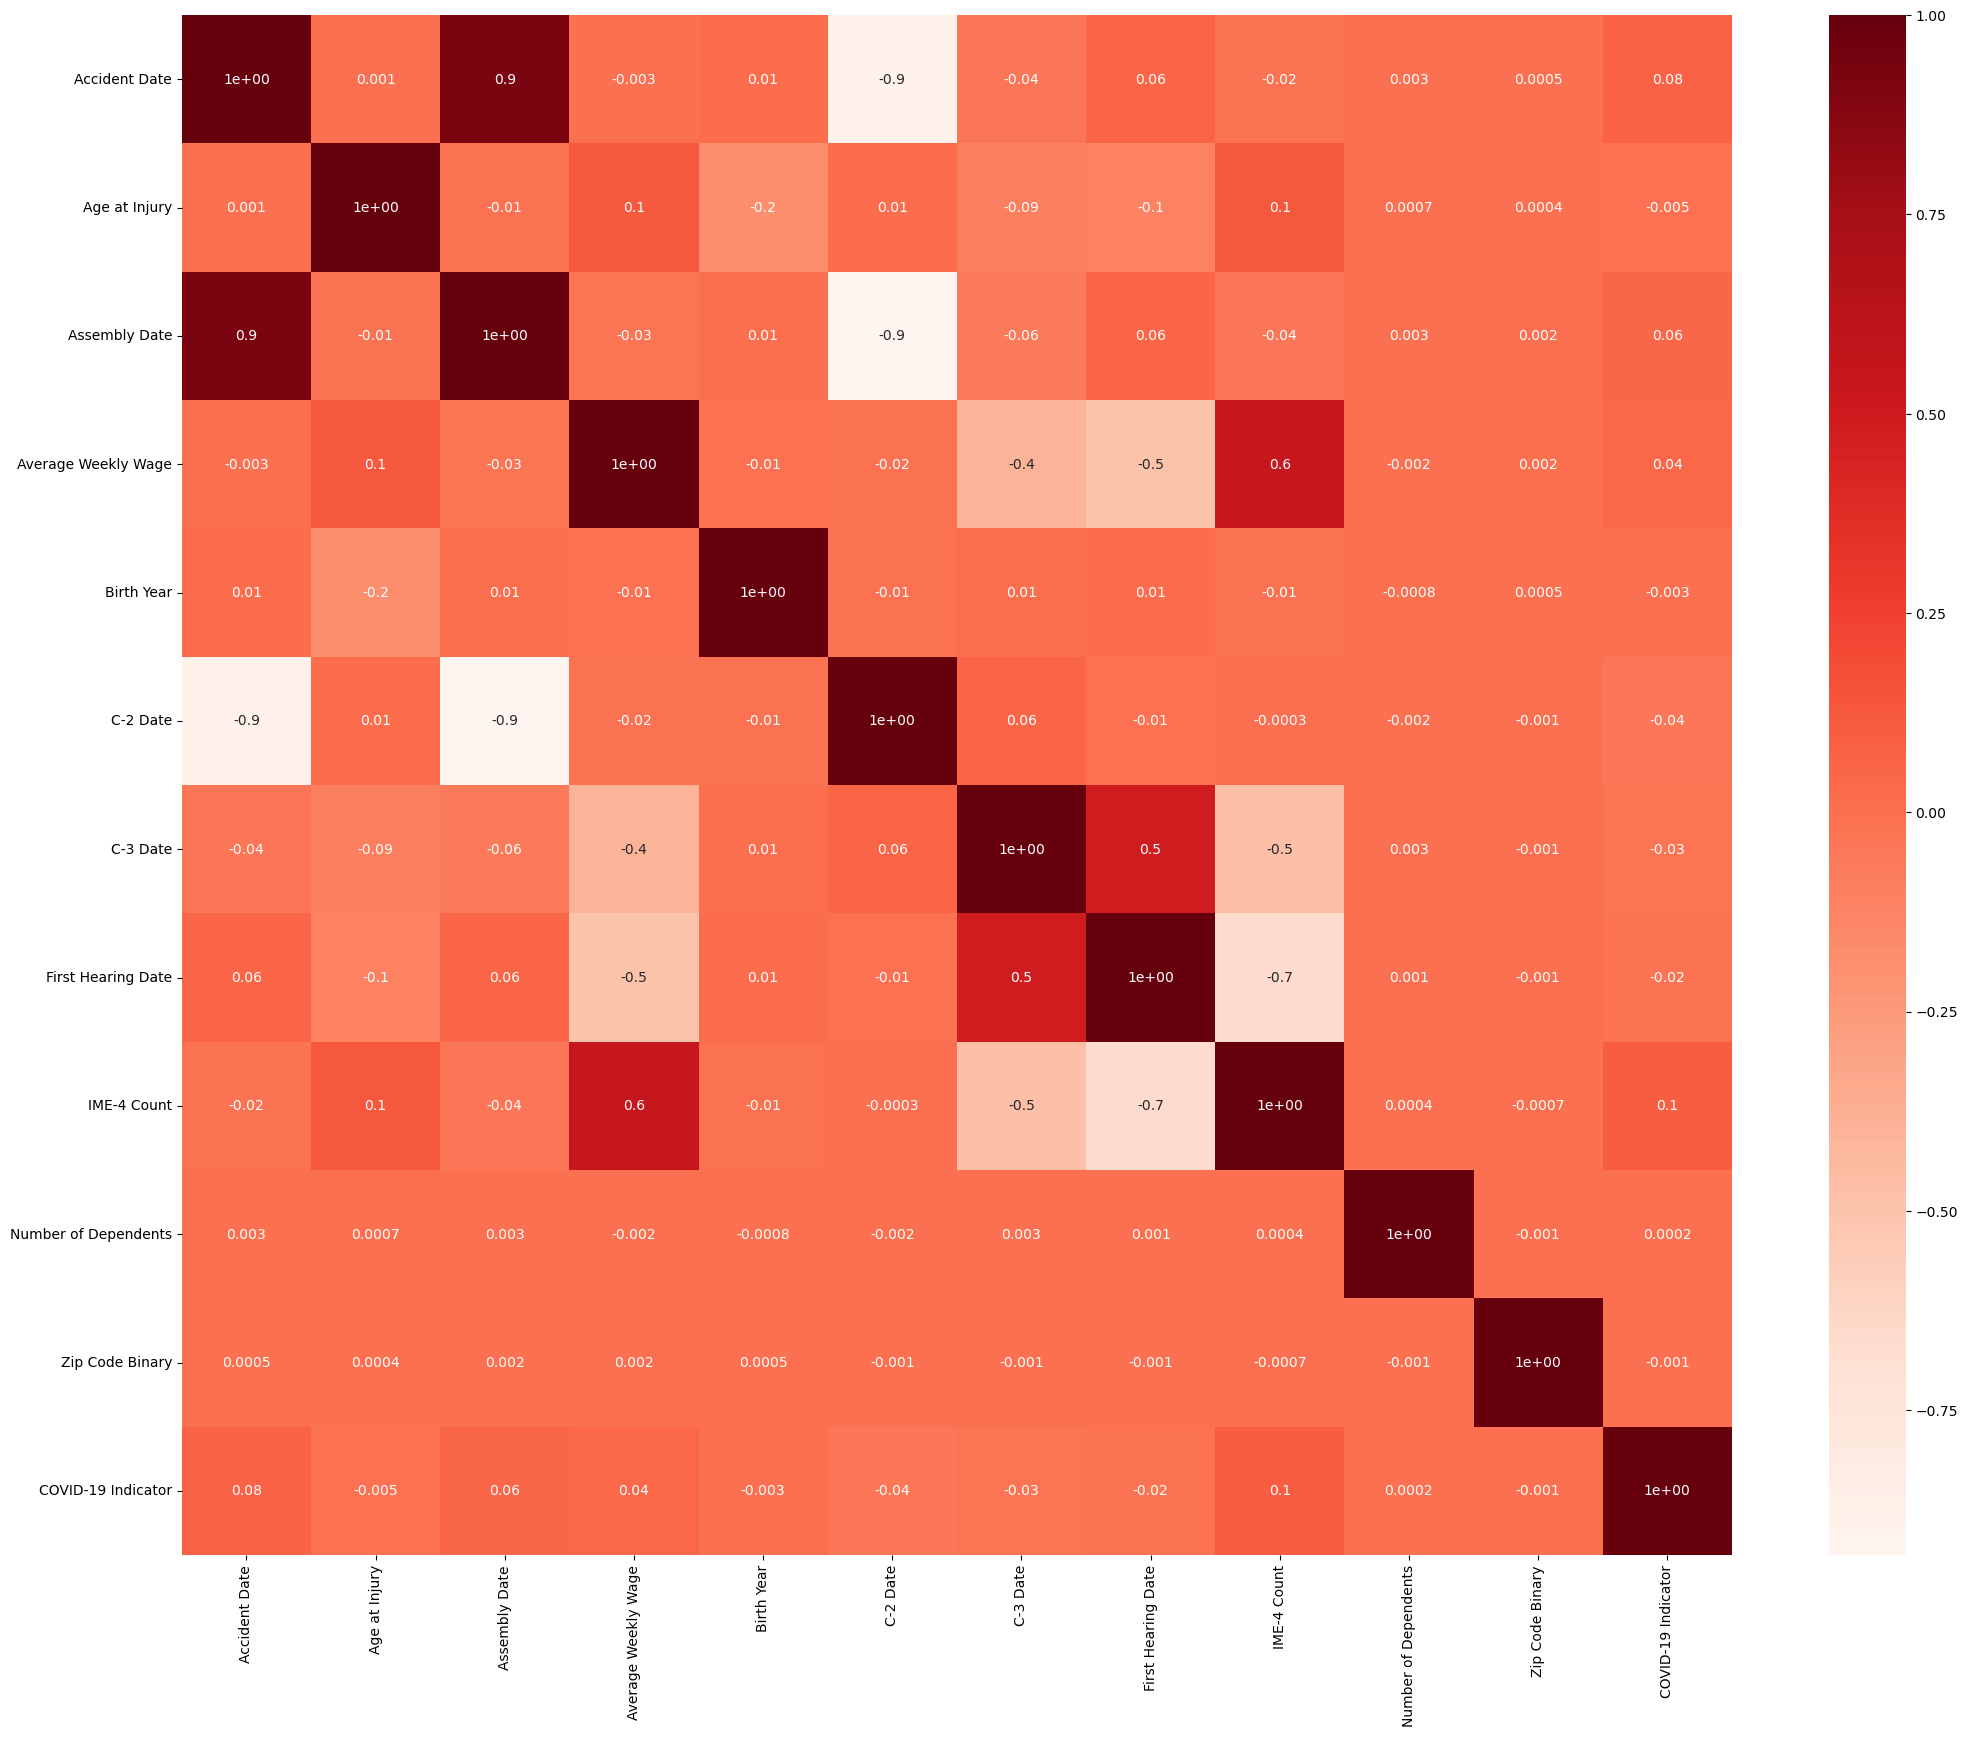

In [74]:
cor_spearman = matrix.corr(method ='spearman')
cor_heatmap(cor_spearman)

*Key Note*: We will assume as our threshold: 0.7.
- Meaning: Any variables that collectively present a value that is higher than 0.7, would indicate to us that they are highly correlated, meaning that it would be interesting to ponder eliminating one of the pairs. Consequently, a final voting system will be applied.

Correlated Features: Assembly Date --> Accident Date


 <a class="anchor" id="wrapper">

## 4.2 Wrapper Methods

</a>

 <a class="anchor" id="rfe">

### 4.2.1 RFE

</a>

For the RFE we will first want to know what would be the optimal features to select:

We will run this code, with steps and using a subsample since it is very expensive computationally

Additionally, the code has been fully adapted in order to compute directly an f1 score, instead of accuracy which does not quite integrate our rationale for the purposes of this model.

#### RFE LOGISTIC

In [75]:
# Number of features to test
nof_list = np.arange(1, 26)            
high_score = 0

# Variable to store the optimum features
nof = 0           
train_f1_list = []
val_f1_list = []

for n in nof_list:
    model = LogisticRegression()  # Logistic regression model
    
    # Perform RFE for n features
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train_final[:50000], y_train_encoded[:50000])
    X_val_rfe = rfe.transform(X_val_final[:50000])
    
    # Fit the model on reduced training set
    model.fit(X_train_rfe, y_train_encoded[:50000])
    
    # Predictions for F1 score
    y_train_pred = model.predict(X_train_rfe)
    y_val_pred = model.predict(X_val_rfe)
    
    # Compute F1 scores
    train_f1 = f1_score(y_train_encoded[:50000], y_train_pred, average="macro") 
    val_f1 = f1_score(y_val_encoded[:50000], y_val_pred, average="macro")        
    
    # Store results
    train_f1_list.append(train_f1)
    val_f1_list.append(val_f1)
    
    # Check for best validation F1 score
    if val_f1 >= high_score:
        high_score = val_f1
        nof = n

# Print results
print("Optimum number of features: %d" % nof)
print("Best F1 Macro Score with %d features: %f" % (nof, high_score))

Optimum number of features: 24
Best F1 Macro Score with 24 features: 0.507213


Output:
- Features: 24
- Score: 0.507213

Interpretation: Not excellent at all for now, but provides a good baseline.

Visualization:

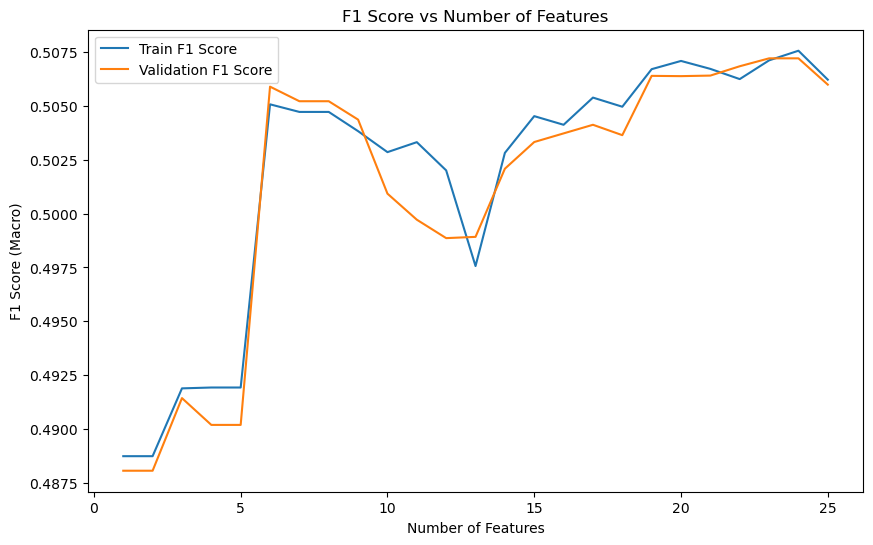

In [76]:

plt.figure(figsize=(10, 6))
plt.plot(nof_list, train_f1_list, label="Train F1 Score")
plt.plot(nof_list, val_f1_list, label="Validation F1 Score")
plt.xlabel("Number of Features")
plt.ylabel("F1 Score (Macro)")
plt.title("F1 Score vs Number of Features")
plt.legend()
plt.show()

Let's check which features RFE is dropping: 

In [77]:
model = LogisticRegression()

rfe = RFE(estimator = model, n_features_to_select = 24)

X_rfe = rfe.fit_transform(X = X_train_final, y = y_train_encoded)
# Checking for selected features
selected_features = pd.Series(rfe.support_, index = X_train_final.columns)
selected_features

Accident Date                      True
Age at Injury                      True
Alternative Dispute Resolution     True
Assembly Date                      True
Attorney/Representative            True
Average Weekly Wage                True
Birth Year                         True
C-2 Date                           True
C-3 Date                           True
Carrier Name                       True
Carrier Type                       True
County of Injury                   True
COVID-19 Indicator                 True
District Name                      True
First Hearing Date                 True
Gender                             True
IME-4 Count                        True
Industry Code                      True
Medical Fee Region                 True
WCIO Cause of Injury Code          True
WCIO Nature of Injury Code         True
WCIO Part Of Body Code             True
Number of Dependents              False
COVID_Industry                     True
Zip Code Binary                    True


Only chooses 24 possible features from the dataset. We could go forward exclusively with these features if we wish to optimize Logistic Regression as much as possible. But for other models, performance will certainly drop.

#### RFE RANDOM FOREST

In [78]:
# Number of features to test
nof_list = np.arange(1, 26)            
high_score = 0

# Variable to store the optimum features
nof = 0           
train_f1_list = []
val_f1_list = []

for n in nof_list:
    model = RandomForestClassifier()  # Logistic regression model
    
    # Perform RFE for n features
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train_final[:50000], y_train_encoded[:50000])
    X_val_rfe = rfe.transform(X_val_final[:50000])
    
    # Fit the model on reduced training set
    model.fit(X_train_rfe, y_train_encoded[:50000])
    
    # Predictions for F1 score
    y_train_pred = model.predict(X_train_rfe)
    y_val_pred = model.predict(X_val_rfe)
    
    # Compute F1 scores
    train_f1 = f1_score(y_train_encoded[:50000], y_train_pred, average="macro") 
    val_f1 = f1_score(y_val_encoded[:50000], y_val_pred, average="macro")        
    
    # Store results
    train_f1_list.append(train_f1)
    val_f1_list.append(val_f1)
    
    # Check for best validation F1 score
    if val_f1 >= high_score:
        high_score = val_f1
        nof = n

# Print results
print("Optimum number of features: %d" % nof)
print("Best F1 Macro Score with %d features: %f" % (nof, high_score))

Optimum number of features: 19
Best F1 Macro Score with 19 features: 0.565686


Output:
- 20
- F1 MACRO: 0.565850

Interpretation: Definetly much better than logistic, with some fine tuning we might be able to optimize further this model.

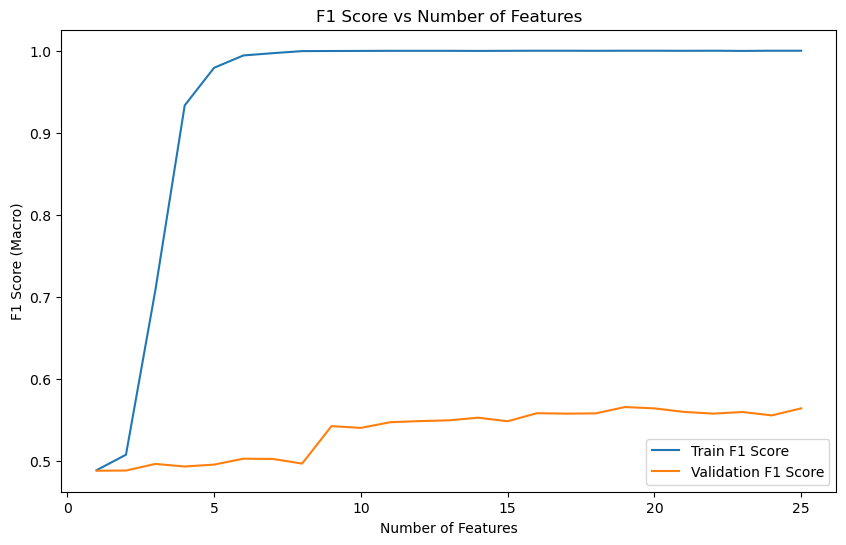

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(nof_list, train_f1_list, label="Train F1 Score")
plt.plot(nof_list, val_f1_list, label="Validation F1 Score")
plt.xlabel("Number of Features")
plt.ylabel("F1 Score (Macro)")
plt.title("F1 Score vs Number of Features")
plt.legend()

- Common problem with Tree type models, clear overfit in training model, might not provide good generalization but we can tune some paramaters to limit the growth of the trees "pruning" and reduce overfitting.

In [80]:
model = RandomForestClassifier()

rfe = RFE(estimator = model, n_features_to_select = 20)

X_rfe = rfe.fit_transform(X = X_train_final, y = y_train_encoded)
# Checking for selected features
selected_features = pd.Series(rfe.support_, index = X_train_final.columns)
selected_features

Accident Date                      True
Age at Injury                      True
Alternative Dispute Resolution    False
Assembly Date                     False
Attorney/Representative            True
Average Weekly Wage                True
Birth Year                        False
C-2 Date                           True
C-3 Date                           True
Carrier Name                       True
Carrier Type                       True
County of Injury                   True
COVID-19 Indicator                False
District Name                      True
First Hearing Date                 True
Gender                             True
IME-4 Count                        True
Industry Code                      True
Medical Fee Region                 True
WCIO Cause of Injury Code          True
WCIO Nature of Injury Code         True
WCIO Part Of Body Code             True
Number of Dependents               True
COVID_Industry                     True
Zip Code Binary                   False


Drops the following Features: ADR / Assembly Date / Birth Year / COVID-19 Indicator / Zip Code Binary

What if Logistic were also to drop 20 features?

In [81]:
model = LogisticRegression()

rfe = RFE(estimator = model, n_features_to_select = 20)

X_rfe = rfe.fit_transform(X = X_train_final, y = y_train_encoded)
# Checking for selected features
selected_features = pd.Series(rfe.support_, index = X_train_final.columns)
selected_features

Accident Date                     False
Age at Injury                      True
Alternative Dispute Resolution     True
Assembly Date                      True
Attorney/Representative            True
Average Weekly Wage                True
Birth Year                        False
C-2 Date                           True
C-3 Date                           True
Carrier Name                       True
Carrier Type                       True
County of Injury                   True
COVID-19 Indicator                 True
District Name                      True
First Hearing Date                 True
Gender                            False
IME-4 Count                        True
Industry Code                      True
Medical Fee Region                 True
WCIO Cause of Injury Code          True
WCIO Nature of Injury Code        False
WCIO Part Of Body Code             True
Number of Dependents              False
COVID_Industry                     True
Zip Code Binary                    True


Drops: Accident Date / Number of Dependents / Birth year / Gender


 <a class="anchor" id="embadded">

## 4.3 Embedded Methods

</a>

 <a class="anchor" id="lasso">

### 4.3.1 LASSO

</a>

In [82]:
regression = LassoCV()

regression.fit(X_train_final,y_train_encoded)

coef = pd.Series(regression.coef_, index = X_train_final.columns)
coef.sort_values()

Attorney/Representative          -0.117681
First Hearing Date               -0.045464
Average Weekly Wage              -0.028478
COVID_Industry                   -0.009202
Medical Fee Region               -0.008491
Industry Code                    -0.005074
Accident Date                    -0.003644
WCIO Cause of Injury Code        -0.001271
Birth Year                       -0.000081
Number of Dependents              0.000000
Zip Code Binary                  -0.000000
Age at Injury                    -0.000000
Gender                            0.000192
County of Injury                  0.001006
WCIO Nature of Injury Code        0.001169
WCIO Part Of Body Code            0.002696
District Name                     0.003430
C-3 Date                          0.011667
Assembly Date                     0.013502
IME-4 Count                       0.013509
Carrier Name                      0.014630
Alternative Dispute Resolution    0.015937
COVID-19 Indicator                0.020988
Carrier Typ

Lasso tells us to drop the following: Birth Year/ Number of Dependents/ Age at Injury / Zip Code Binary / COVID_Industry

### FINAL INSIGHTS:

<hr>

| Predictor | Spearman | RFE LR| RFE RFC | Lasso | What to do? | 
| --- | --- | --- | --- |--- |---|
| COVID-19 Indicator | Keep | Keep | Remove | Keep | Include in the model |
| Number of Dependents | Keep | Remove | Remove |Remove| Discard |
| Zip Code Binary | Keep | Remove | Remove | Remove | Discard |
| Birth Year | Keep | Remove | Remove | Remove  | Discard  |
| Alternative Dispute Resolution | Keep | Keep | Remove | Keep | Include in the model |
| Industry Code | Keep  | Keep|Keep | Keep | Include in the model  |
| Age at Injury |  Keep |Keep | Keep|  Remove|  Include in the model |
| Covid Industry |  Keep |Keep | Keep| Remove | Include in the model |
| Assembly Date |  Ponder Removal | Keep|Remove | Remove | Discard |
| Accident Date |  Ponder Removal | Remove| Keep| Remove | Include in the model |
<hr>

Notes:
- Between Assembly Date and Accident Date it might be trial and error to determine exactly which set is best for our model.
- COVID 19 and COVID Industry, are in reality quite similar, we also note that covid industry is a jointure of both industry code and covid 19 indicator. Since Industry Code is being kept already, we might want to drop COVID_19 Industry, to avoid redundancy!

 <a class="anchor" id="model">

# 5. Model Assessment - Baselines

</a>

First and foremost, we need to understand which metric it is that we wish to optimize. There are several options:
- Accuracy: Good for balanced datasets, where Positive and Negative have roughly the same number of samples.
- Weighted F1: Calculates a mean for precision and recall adjusted for class imbalance.
- Macro F1: This is similar to F1 but instead of giving same weight to all classes, it treats classes equally and gives an overall sense of performance across both classes.
- Standard F1 Score: Allows us to check precision and recall for all classes (in our case minority class). This is key due to the severe class imbalance present. What we are wishing to optimize is the number of Agreement Reached (1) that are actually classifed as 1. 

*Note*: For our purposes, we will take an overview of Macro and Standard F1 score performances. Given that our wish is to predict correctly the occasions which are rare. The model is always going to predict largely a positive percentage of the most common class... Our goal is to reduce that difference between the most common and less common one.

In [83]:
X_train_final = X_train_final.drop(columns=["Number of Dependents", "Zip Code Binary", 'Birth Year', "Assembly Date", "COVID-19 Indicator"])

X_val_final = X_val_final.drop(columns=["Number of Dependents", "Zip Code Binary", "Birth Year", "Assembly Date","COVID-19 Indicator"])

test_final = test_final.drop(columns=["Number of Dependents", "Zip Code Binary", "Birth Year", "Assembly Date", "COVID-19 Indicator"])

This functions allows us to get directly a good overview of baseline performance for different models. "Baseline" for us, indicates a simple implementation of a model, without any tuning. Therefore, the process here, involves finding those models that perform best, and tuning some of them to achieve better results.
- As mentioned before, accuracy is neglected here, as well as F1 Weighted.

In [84]:
def fit_and_evaluate_model(model, X_train_final, y_train_encoded, X_val_final, y_val_encoded):
    # Fit the model
    model.fit(X_train_final, y_train_encoded)
    
    # Predictions for validation and training sets
    y_pred_val = model.predict(X_val_final)
    y_pred_train = model.predict(X_train_final)
    
    # Calculate F1 scores
    f1_train_2 = f1_score(y_train_encoded, y_pred_train, average="macro")
    f1_val_2 = f1_score(y_val_encoded, y_pred_val, average="macro")
    f1_t = f1_score(y_val_encoded, y_pred_val)
    f1_v = f1_score(y_val_encoded, y_pred_val)
    
    # Print F1 scores
    print(f"F1 Macro Score on Training Set: {f1_train_2}")
    print(f"F1 Macro Score on Validation Set: {f1_val_2}")

    print(f"Standard F1 Score on Training Set: {f1_t}")
    print(f"Standard F1 Score on Validation Set: {f1_v}")

    
    # Check for overfitting
    if f1_train_2 > f1_val_2 + 0.05:  # Threshold for overfitting can be adjusted
        print("Warning: Possible overfitting detected. F1 Score on training set is higher.")
    elif f1_train_2 > f1_val_2:
        print("Model might be underfitting, as the validation score is better than the training score.")
    else:
        print("Model appears to generalize well.")
    
    return model


In [ ]:
# logistic regression
log = LogisticRegression(random_state=42, max_iter=1000)
log = fit_and_evaluate_model(log, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.5057435589297851
F1 Macro Score on Validation Set: 0.5053218152290734
Standard F1 Score on Training Set: 0.034690366972477064
Standard F1 Score on Validation Set: 0.034690366972477064
Model might be underfitting, as the validation score is better than the training score.


In [ ]:
rf = RandomForestClassifier(random_state=42)
rf = fit_and_evaluate_model(rf, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.9986271149054751
F1 Macro Score on Validation Set: 0.6079666782943205
Standard F1 Score on Training Set: 0.23856090788361706
Standard F1 Score on Validation Set: 0.23856090788361706


In [ ]:
gb = GradientBoostingClassifier()
gb = fit_and_evaluate_model(gb, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.5624539057794026
F1 Macro Score on Validation Set: 0.561659990562757
Standard F1 Score on Training Set: 0.1459262261856506
Standard F1 Score on Validation Set: 0.1459262261856506
Model might be underfitting, as the validation score is better than the training score.


In [ ]:
xgb = XGBClassifier()
xgb = fit_and_evaluate_model(xgb, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.6509324415312218
F1 Macro Score on Validation Set: 0.6204915616762858
Standard F1 Score on Training Set: 0.2631892342503275
Standard F1 Score on Validation Set: 0.2631892342503275
Model might be underfitting, as the validation score is better than the training score.


*Note*: Comparing this option with Random Forest, overfitting has severely reduced and performance is greater!

In [ ]:
dt = DecisionTreeClassifier()
dt = fit_and_evaluate_model(dt,X_train_final,y_train_encoded,X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.9986786632488838
F1 Macro Score on Validation Set: 0.6399841602685901
Standard F1 Score on Training Set: 0.31603839198775907
Standard F1 Score on Validation Set: 0.31603839198775907


In [85]:
cat = CatBoostClassifier()
cat = fit_and_evaluate_model(cat, X_train_final,y_train_encoded,X_val_final,y_val_encoded)

Learning rate set to 0.137293
0:	learn: 0.4619717	total: 223ms	remaining: 3m 43s
1:	learn: 0.3418962	total: 272ms	remaining: 2m 15s
2:	learn: 0.2533956	total: 319ms	remaining: 1m 46s
3:	learn: 0.2037884	total: 363ms	remaining: 1m 30s
4:	learn: 0.1753430	total: 412ms	remaining: 1m 22s
5:	learn: 0.1577824	total: 465ms	remaining: 1m 17s
6:	learn: 0.1471892	total: 513ms	remaining: 1m 12s
7:	learn: 0.1404088	total: 550ms	remaining: 1m 8s
8:	learn: 0.1358870	total: 588ms	remaining: 1m 4s
9:	learn: 0.1311123	total: 627ms	remaining: 1m 2s
10:	learn: 0.1285767	total: 664ms	remaining: 59.7s
11:	learn: 0.1267473	total: 708ms	remaining: 58.3s
12:	learn: 0.1251966	total: 747ms	remaining: 56.7s
13:	learn: 0.1242951	total: 786ms	remaining: 55.4s
14:	learn: 0.1233451	total: 824ms	remaining: 54.1s
15:	learn: 0.1226818	total: 862ms	remaining: 53s
16:	learn: 0.1220799	total: 907ms	remaining: 52.5s
17:	learn: 0.1214803	total: 955ms	remaining: 52.1s
18:	learn: 0.1211070	total: 991ms	remaining: 51.2s
19:	le

In [ ]:
knn = KNeighborsClassifier()
knn = fit_and_evaluate_model(cat, X_train_final,y_train_encoded,X_val_final,y_val_encoded)

Learning rate set to 0.137293
0:	learn: 0.4631664	total: 91.9ms	remaining: 1m 31s
1:	learn: 0.3425498	total: 181ms	remaining: 1m 30s
2:	learn: 0.2538895	total: 268ms	remaining: 1m 29s
3:	learn: 0.2040777	total: 354ms	remaining: 1m 28s
4:	learn: 0.1755126	total: 447ms	remaining: 1m 28s
5:	learn: 0.1578921	total: 549ms	remaining: 1m 30s
6:	learn: 0.1477999	total: 642ms	remaining: 1m 31s
7:	learn: 0.1407544	total: 739ms	remaining: 1m 31s
8:	learn: 0.1345807	total: 827ms	remaining: 1m 31s
9:	learn: 0.1312120	total: 910ms	remaining: 1m 30s
10:	learn: 0.1288423	total: 999ms	remaining: 1m 29s
11:	learn: 0.1262359	total: 1.09s	remaining: 1m 29s
12:	learn: 0.1250810	total: 1.17s	remaining: 1m 29s
13:	learn: 0.1238621	total: 1.26s	remaining: 1m 28s
14:	learn: 0.1228458	total: 1.35s	remaining: 1m 28s
15:	learn: 0.1222547	total: 1.44s	remaining: 1m 28s
16:	learn: 0.1217283	total: 1.53s	remaining: 1m 28s
17:	learn: 0.1213117	total: 1.63s	remaining: 1m 28s
18:	learn: 0.1208866	total: 1.73s	remaining

In [ ]:
neural = MLPClassifier()
neural = fit_and_evaluate_model(neural, X_train_final,y_train_encoded,X_val_final,y_val_encoded)

F1 Macro Score on Training Set: 0.5974732563185843
F1 Macro Score on Validation Set: 0.5868704181125612
Standard F1 Score on Training Set: 0.19648056716040005
Standard F1 Score on Validation Set: 0.19648056716040005
Model might be underfitting, as the validation score is better than the training score.


Note: Very interesting that CatBoost and KNN have exact same performance (for this seed)!

#### Analysis of Baseline Models:

- KNN, NeuralNetwork, CatBoost, RandomForest (altought it overfits, but can be solved), seem to have the best performance out of this bunch. The following goal will be to optimize a few, and get to the best performance possible of the minority class.

## 6. Optimization

In [86]:
# Combine train and validation datasets
X_combined = np.concatenate([X_train_final, X_val_final])
y_combined = np.concatenate([y_train_encoded, y_val_encoded])

# Create a test fold index (-1 for train, 0 for validation)
test_fold = [-1] * len(X_train_final) + [0] * len(X_val_final)

# Ensure lengths match
assert len(X_combined) == len(test_fold), "Mismatch between data and test_fold lengths"
assert len(y_combined) == len(test_fold), "Mismatch between target and test_fold lengths"

# Define the PredefinedSplit
ps = PredefinedSplit(test_fold=test_fold)

#### 1. Decision Tree

RandomizedSearch:

In [ ]:

# param_grid = {
#     'max_depth': [4, 6, 8, 10],  
#     'min_impurity_decrease': [0.0, 0.001, 0.01, 0.1], 
#     'min_samples_split': [2, 5, 10, 20, 50], 
#     'min_samples_leaf': [1, 2, 5, 10],  
#     'criterion': ['gini', 'entropy'], 
# }

# dt = DecisionTreeClassifier(random_state=42)

# random_dt = RandomizedSearchCV(
#     estimator=dt,
#     param_distributions=param_grid,
#     scoring='f1_macro', 
#     cv=ps,
#     n_iter=400,           
#     n_jobs=-1,         
#     verbose=1         
# )

# random_dt.fit(X_combined, y_combined)

# # Best parameters and best score
# print("Best parameters found:", random_dt.best_params_)
# print("Best F1 Macro achieved:", random_dt.best_score_)

In [ ]:
### The Model:
dt_random = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, min_impurity_decrease=0, max_depth=10, criterion="gini" )
dt_random = fit_and_evaluate_model(dt_random, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.5692629800181115
F1 Macro Score on Validation Set: 0.5592496797010162
Standard F1 Score on Training Set: 0.14131897711978467
Standard F1 Score on Validation Set: 0.14131897711978467
Model might be underfitting, as the validation score is better than the training score.


So performance dropped, because we significantly reduced overfitting! In this matter, the model becomes more generizable which is good, but perfromance is not at a top level. Other models might be more appropriate.

##### GridSearch:

In [ ]:

# param_grid = {
#     'max_depth': [ 10,14,9,8,11,12],  
#     'min_samples_split': [4, 5,6 ],  
#     'min_samples_leaf': [1, 2, 0],  
#     'criterion': ['gini', 'entropy'],  
# }

# dt = DecisionTreeClassifier(random_state=42)


# grid_dt = GridSearchCV(
#     estimator=dt,
#     param_grid=param_grid,
#     scoring='f1_macro', 
#     cv=ps,              
#     n_jobs=-1,          
#     verbose=1           
# )

# # Fit the grid search to the data
# grid_dt.fit(X_combined, y_combined)

# # Best parameters and best score
# print("Best parameters found:", grid_dt.best_params_)
# print("Best F1 Macro achieved:", grid_dt.best_score_)

Clearly the parameters min samples, criterion and min_samples_split are set. Max depth seems to vary because it will optimize performance, meaning that it will try to extend as much as possible because as we have seen, performance increases. 
- Nevertheless, as performance increases overfitting increases too, we will settle at around 13 for max depth. A good compromise between performance and overfitting.

In [ ]:
### The Model:
dt_grid = DecisionTreeClassifier(criterion="gini", max_depth=13, min_samples_leaf=1, min_samples_split=6)
dt_grid = fit_and_evaluate_model(dt_grid, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.629830495209948
F1 Macro Score on Validation Set: 0.5851358391647923
Standard F1 Score on Training Set: 0.19394235466536394
Standard F1 Score on Validation Set: 0.19394235466536394
Model might be underfitting, as the validation score is better than the training score.


#### 3. CatBoost

Randomized Search

In [ ]:
# param_grid = {
#     'iterations': [200, 500, 700, 1000],       
#     'learning_rate': [0.01, 0.05, 0.1, 0.2], 
#     'depth': [4, 6, 8, 10],                  
#     'l2_leaf_reg': [1, 3, 5, 7],          
#     'border_count': [32, 64, 128],            
#     'random_strength': [1, 2, 5, 10],         
#     'bagging_temperature': [0, 0.5, 1, 2],   
#     'scale_pos_weight': [1, 5, 10],          
#     'boosting_type': ['Plain', 'Ordered'],    
#     'eval_metric': ['F1', 'Accuracy'],        
#     'leaf_estimation_iterations': [1, 5, 10]  
# }

# cat = CatBoostClassifier()

# cat_random = RandomizedSearchCV(
#     estimator = cat,
#     param_distributions = param_grid,
#     n_iter=200,
#     scoring="f1_macro",
#     cv=ps,
#     n_jobs=-1,
#     verbose=True
# )

# cat_random.fit(X_combined,y_combined)

# # Best parameters and best score
# print("Best parameters found:", cat_random.best_params_)
# print("Best F1 Macro Score achieved:", cat_random.best_score_)

Output: 
- Best parameters found: {'scale_pos_weight': 5, 'random_strength': 1, 'learning_rate': 0.2, 'leaf_estimation_iterations': 10, 'l2_leaf_reg': 7, 'iterations': 500, 'eval_metric': 'Accuracy', 'depth': 8, 'border_count': 128, 'boosting_type': 'Plain', 'bagging_temperature': 0.5}
- Best F1 Macro Score achieved: 0.7097227408786342

In [ ]:
cat_rand = CatBoostClassifier(scale_pos_weight = 5, random_strength = 1, learning_rate=0.2, leaf_estimation_iterations=10, l2_leaf_reg=7, iterations=500, eval_metric="F1", depth = 8, border_count=128, boosting_type="Plain", bagging_temperature=0.5)
cat_rand = fit_and_evaluate_model(cat_rand, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

0:	learn: 0.6576956	total: 183ms	remaining: 1m 31s
1:	learn: 0.6529689	total: 305ms	remaining: 1m 15s
2:	learn: 0.6672065	total: 428ms	remaining: 1m 10s
3:	learn: 0.6747235	total: 546ms	remaining: 1m 7s
4:	learn: 0.6728009	total: 665ms	remaining: 1m 5s
5:	learn: 0.6754203	total: 783ms	remaining: 1m 4s
6:	learn: 0.6773512	total: 905ms	remaining: 1m 3s
7:	learn: 0.6804102	total: 1.03s	remaining: 1m 3s
8:	learn: 0.6819253	total: 1.15s	remaining: 1m 2s
9:	learn: 0.6818710	total: 1.28s	remaining: 1m 2s
10:	learn: 0.6828154	total: 1.38s	remaining: 1m 1s
11:	learn: 0.6836691	total: 1.49s	remaining: 1m
12:	learn: 0.6851931	total: 1.62s	remaining: 1m
13:	learn: 0.6887538	total: 1.75s	remaining: 1m
14:	learn: 0.6900394	total: 1.87s	remaining: 1m
15:	learn: 0.6930683	total: 1.99s	remaining: 1m
16:	learn: 0.6956357	total: 2.13s	remaining: 1m
17:	learn: 0.6966593	total: 2.28s	remaining: 1m 1s
18:	learn: 0.6968618	total: 2.42s	remaining: 1m 1s
19:	learn: 0.6973725	total: 2.56s	remaining: 1m 1s
20:	l

Slight Overfitting but great performance!

GridSearch

In [ ]:
# param_grid = {
#     'iterations': [500,550,600],      
#     'learning_rate': [0.2,0.21,0.22,0.23],  
#     'depth': [8,9],                  
#     'l2_leaf_reg': [7,8,9],            
#     'border_count': [128,256],            
# }

# cat = CatBoostClassifier()

# cat_grid = GridSearchCV(
#     estimator = cat,
#     param_grid = param_grid,
#     scoring="f1_macro",
#     cv=ps,
#     n_jobs=-1,
#     verbose=True
# )

# cat_grid.fit(X_combined,y_combined)

# # Best parameters and best score
# print("Best parameters found:", cat_grid.best_params_)
# print("Best F1 Macro Score achieved:", cat_grid.best_score_)

Output (ran on a different PC)
- Border_count = 256 / depth = 9 / iterations = 600 / l2_leaf_reg = 9 / learning_rate = 0.23
- Macro: 0.64 -- Significant decrease in Performance.

In [87]:
cat_grid = CatBoostClassifier(scale_pos_weight = 5, random_strength = 1, learning_rate=0.23, leaf_estimation_iterations=10, l2_leaf_reg=9, iterations=200, eval_metric="F1", depth = 7, border_count=256, boosting_type="Plain", bagging_temperature=0.5)
cat_grid = fit_and_evaluate_model(cat_grid, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

0:	learn: 0.6375426	total: 50.1ms	remaining: 9.96s
1:	learn: 0.6484677	total: 102ms	remaining: 10.1s
2:	learn: 0.6416296	total: 147ms	remaining: 9.63s
3:	learn: 0.6475046	total: 202ms	remaining: 9.9s
4:	learn: 0.6466492	total: 247ms	remaining: 9.64s
5:	learn: 0.6589509	total: 312ms	remaining: 10.1s
6:	learn: 0.6608093	total: 366ms	remaining: 10.1s
7:	learn: 0.6646598	total: 416ms	remaining: 9.99s
8:	learn: 0.6685998	total: 469ms	remaining: 9.96s
9:	learn: 0.6768367	total: 526ms	remaining: 10s
10:	learn: 0.6770950	total: 581ms	remaining: 9.98s
11:	learn: 0.6779033	total: 641ms	remaining: 10s
12:	learn: 0.6811718	total: 690ms	remaining: 9.93s
13:	learn: 0.6816099	total: 737ms	remaining: 9.79s
14:	learn: 0.6820702	total: 790ms	remaining: 9.74s
15:	learn: 0.6831757	total: 845ms	remaining: 9.72s
16:	learn: 0.6851805	total: 896ms	remaining: 9.64s
17:	learn: 0.6864082	total: 948ms	remaining: 9.59s
18:	learn: 0.6874202	total: 1.01s	remaining: 9.6s
19:	learn: 0.6892747	total: 1.05s	remaining: 9

Idea behind this: Try to limit overfitting while keept performance high. Depth is a key parameter to control, the models will always want to extend depth which translated in a higher tree and higher performance in the train set. Consequently by doing so, overfitting increases.
If we balance learning rate, iterations and depth we might get to a more satisfying outcome.

*Conclusion*: We came to a satisfying result where overfitting was clearly reduced by controlling iterations and depth. Performance does not drop too much. But we have better generability!

#### 3. XGBoost

Randomized Search

In [ ]:
# param_grid = {
#     'n_estimators': [100, 300, 500],          
#     'learning_rate': [0.01, 0.05, 0.1],       
#     'max_depth': [3, 6, 9],                   
#     'min_child_weight': [1, 3, 5],            
#     'subsample': [0.8, 1.0],                 
#     'colsample_bytree': [0.8, 1.0],          
# }


# xgb_random = RandomizedSearchCV(
#     estimator = xgb,
#     param_distributions = param_grid,
#     n_iter=100,
#     scoring="f1_macro",
#     cv=ps,
#     n_jobs=-1,
#     verbose=True
# )

# xgb_random.fit(X_combined,y_combined)

# # Best parameters and best score
# print("Best parameters found:", xgb_random.best_params_)
# print("Best F1 Macro Score achieved:", xgb_random.best_score_)

In [ ]:
xgb_random = XGBClassifier(subsample=1,n_estimators=500, min_child_weight=3, max_depth=9, learning_rate=0.1, colsample_bytree=1)
xgb_random = fit_and_evaluate_model(xgb_random, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.7916821163873907
F1 Macro Score on Validation Set: 0.6373524893950336
Standard F1 Score on Training Set: 0.29720318993597666
Standard F1 Score on Validation Set: 0.29720318993597666


Grid Search

In [ ]:
# param_grid = {
#     'n_estimators': [400, 500,600],          
#     'learning_rate': [0.1, 0.09, 0.08, 0.11],      
#     'max_depth': [6,7,8],                  
#     'min_child_weight': [2,3,4],            
# }


# xgb = XGBClassifier()

# grid_xgb = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring='f1_macro',  
#     cv=ps,               
#     n_jobs=-1,         
#     verbose=1           
# )

# # Fit the grid search to the data
# grid_xgb.fit(X_combined, y_combined)

# # Best parameters and best score
# print("Best parameters found:", grid_xgb.best_params_)
# print("Best F1 Macro achieved:", grid_xgb.best_score_)

In [ ]:
xgb_grid = XGBClassifier(learning_rate=0.11, max_depth=8, min_child_weight=2, n_estimators=600,colsample_bytree=1,subsample=1)
xgb_grid = fit_and_evaluate_model(xgb_random, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.7916821163873907
F1 Macro Score on Validation Set: 0.6373524893950336
Standard F1 Score on Training Set: 0.29720318993597666
Standard F1 Score on Validation Set: 0.29720318993597666


Performance decreases a bit, by overfitting reduces imensly!

### More Fine Tuning:

In [ ]:
# param_grid = {
#     'n_estimators': [600,700,800],           
#     'learning_rate': [0.01, 0.05, 0.1],       
#     'max_depth': [8,9,10],                   
#     'subsample': [0.9, 1.0,1.1],                  
#     'colsample_bytree': [0.9, 1.0,1.1],           
# }


# xgb = XGBClassifier()

# grid_xgb = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring='f1_macro',  
#     cv=ps,               
#     n_jobs=-1,        
#     verbose=1          
# )

# grid_xgb.fit(X_combined, y_combined)

# # Best parameters and best score
# print("Best parameters found:", grid_xgb.best_params_)
# print("Best F1 Macro achieved:", grid_xgb.best_score_)

In [ ]:
xgb_grid_2 = XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=700,colsample_bytree=0.9,subsample=0.9)
xgb_grid_2 = fit_and_evaluate_model(xgb_random, X_train_final, y_train_encoded, X_val_final, y_val_encoded)

F1 Macro Score on Training Set: 0.7916821163873907
F1 Macro Score on Validation Set: 0.6373524893950336
Standard F1 Score on Training Set: 0.29720318993597666
Standard F1 Score on Validation Set: 0.29720318993597666


## 7. Analysis:

#### 1. Decision Tree

Using the model that is tuned:

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))


labels_train = dt_grid.predict(X_train_final)
labels_val = dt_grid.predict(X_val_final)

metrics(y_train=y_train_encoded, pred_train=labels_train, y_val=y_val_encoded, pred_val=labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    410429
           1       0.81      0.17      0.28     20090

    accuracy                           0.96    430519
   macro avg       0.88      0.58      0.63    430519
weighted avg       0.95      0.96      0.95    430519

[[409615    814]
 [ 16679   3411]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

As we can see, altough efforts were made, predictability of the minority class decreases quite heavily in validation set. Nevertheless, f1 of 0.2, and a macro average of 0.58 is not terrible performance.

#### 2. CatBoost

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))


labels_train = cat_rand.predict(X_train_final)
labels_val = cat_rand.predict(X_val_final)

metrics(y_train=y_train_encoded, pred_train=labels_train, y_val=y_val_encoded, pred_val=labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    410429
           1       0.46      0.84      0.60     20090

    accuracy                           0.95    430519
   macro avg       0.73      0.90      0.78    430519
weighted avg       0.97      0.95      0.95    430519

[[390704  19725]
 [  3184  16906]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

Our clear and best performer, 0.45 standard f1 score on the minority class, is very decent. Precision and Recall present decent scores. By far much superior to any other model. And we would go forward with this one, hopefully through some more fine tuning we could even reduce overfitting a bit more at the cost of a slight decrease in score.

#### 2.1 CatBoost - Grid

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))


labels_train = cat_grid.predict(X_train_final)
labels_val = cat_grid.predict(X_val_final)

metrics(y_train=y_train_encoded, pred_train=labels_train, y_val=y_val_encoded, pred_val=labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.94      0.96    410429
           1       0.37      0.76      0.50     20090

    accuracy                           0.93    430519
   macro avg       0.68      0.85      0.73    430519
weighted avg       0.96      0.93      0.94    430519

[[384463  25966]
 [  4882  15208]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

**THE DROP OFF IN SCORES COMPARED TO CAT_RAND IS MUCH BETTER. WE CLEARLY CONTROLLED OVERFITTING, AND PERFORMANCE IS STILL VERY REASONABLE!**

#### 3. XGBoost

In [ ]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))


labels_train = xgb_grid_2.predict(X_train_final)
labels_val = xgb_grid_2.predict(X_val_final)

metrics(y_train=y_train_encoded, pred_train=labels_train, y_val=y_val_encoded, pred_val=labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    410429
           1       0.94      0.44      0.60     20090

    accuracy                           0.97    430519
   macro avg       0.96      0.72      0.79    430519
weighted avg       0.97      0.97      0.97    430519

[[409889    540]
 [ 11299   8791]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
--------------------------------------------------------------------------------------------------

Much better results than the Decision Tree, better predicatability of the minority class, higher Macro F1, higher standard F1 score of Minority class, and finally, a controlled management of overfitting, providing somewhat reliable results.

## 8. Conclusion

#### Model Performance & Assesment

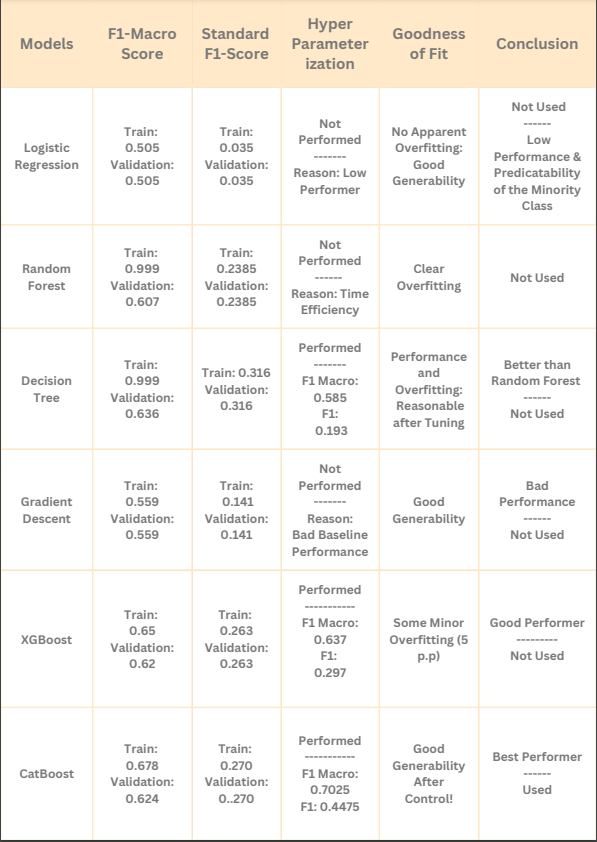

### Future Problems & Different Solutions to Explore Further

- Oversampling of the Minority Class: This can be a key solution and could prove useful to experiment. Oversampling involves creating artificial data points, for the minority class, meaning artificial rows that could allow the models to learn more minute patterns and therefore increase predictability.

- Increased Fine Tuning: Due to time and computational ressources, we did not perform the best possible randomized and grid searches. Time efficiency was essential for our work, and therefore we tried to balance all possible aspects to provide the best set of conclusions. Hence, we incentivize any reader to further enhance the grids and iterations.

# Open Ended Section

In [ ]:
# Salvar o modelo treinado diretamente na pasta model
cat_grid.save_model('model/cat_grid.cbm')